In [12]:
import tabula
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import preprocessing

In [13]:
prep2015 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2015.csv")
prep2016 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2016.csv")
prep2017 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2017.csv")
prep2018 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2018.csv")
prep2019 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2019.csv")
prep2020 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2020.csv")
prep2021 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2021.csv")
prep2022 = pd.read_csv("C:/Users/him_6/Documents/mcd/csv/prep2022.csv")

In [14]:
prep2015 = prep2015.dropna(axis=1)
prep2016 = prep2016.dropna(axis=1)
prep2017 = prep2017.dropna(axis=1)
prep2018 = prep2018.dropna(axis=1)
prep2019 = prep2019.dropna(axis=1)
prep2020 = prep2020.dropna(axis=1)
prep2021 = prep2021.dropna(axis=1)
prep2022 = prep2022.dropna(axis=1)

In [15]:
# Lista de DataFrames que quieres convertir a mayúsculas
dataframes = [prep2015, prep2016, prep2017, prep2018, prep2019, prep2020, prep2021, prep2022]


for df in dataframes:
        for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.upper()

    # Convertir todos los valores a strings
    df = df.astype(str)

In [16]:
# diccionario de reemplazos
reemplazos = {
    "CIUDAD DE MÃ©XICO": "CIUDAD DE MEXICO",
    "DISTRITO FEDERAL": "CIUDAD DE MEXICO",
    "ESTADO DE MÃ©XICO": "ESTADO DE MEXICO",
    "NUEVO LEÃ³N": "NUEVO LEON",
    "QUERÃ©TARO": "QUERETARO",
    "YUCATÃ¡N": "YUCATAN",
    "MICHOACÃ¡N": "MICHOACAN",
    "SAN LUIS POTOSÃ": "SAN LUIS POTOSI"
}

# Lista de DataFrames
dataframes = [prep2015, prep2016, prep2017, prep2018, prep2019, prep2020, prep2021, prep2022]

# Aplicar reemplazos a la columna "ENTIDAD" en cada DataFrame
for df in dataframes:
    df['ENTIDAD'] = df['ENTIDAD'].replace(reemplazos, regex=True)

In [17]:
print(prep2016)

                ENTIDAD    ENE   FEB   MAR   ABR    MAY    JUN    JUL    AGO  \
0        AGUASCALIENTES    4.4   9.6  12.7   1.7    6.3   71.0  172.7  193.6   
1       BAJA CALIFORNIA   44.3   0.1  14.7  13.9    2.7    9.0   26.1   31.0   
2   BAJA CALIFORNIA SUR    5.6   0.3   8.0   2.6    3.1    6.5   23.6   54.3   
3              CAMPECHE   50.4  33.8  33.1  19.3   61.7  244.9  180.9  173.3   
4              COAHUILA   21.6   3.1  56.3  28.5   46.7   45.4   51.2  147.7   
5                COLIMA   85.6   0.8  16.5   0.2    5.5  158.7  252.2  340.7   
6               CHIAPAS   33.9  26.6  30.0  28.9  143.8  281.9  177.8  306.7   
7             CHIHUAHUA    5.8   0.5   7.6   7.1   11.7   56.8  110.0  190.8   
8      CIUDAD DE MEXICO    6.7   0.8  27.8  19.0   51.8  113.0  131.9  128.4   
9               DURANGO    8.3   3.6  18.7   3.1    8.9   56.7  104.0  180.4   
10           GUANAJUATO    7.4   4.1  25.0  10.0   42.2  104.1  173.0  218.3   
11             GUERRERO   22.1   1.0  52

In [18]:
# Lista de DataFrames que deseas concatenar
dataframes = [prep2015, prep2016, prep2017, prep2018, prep2019, prep2020, prep2021, prep2022]

# Agrega un suffix a cada DataFrame antes de concatenar
keys = ['_15', '_16', '_17', '_18', '_19', '_20', '_21', '_22']
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i].add_suffix(keys[i])

# Concatena los DataFrames en la lista usando pd.concat
med_merge = pd.concat(dataframes, axis=1)

# resultado final en DataFrame 'med_merge'
precip = med_merge

In [19]:
precip.shape

(33, 112)

In [20]:
precip

ENTIDAD_15  ENE_15  FEB_15  MAR_15  ABR_15  MAY_15  JUN_15  \
0        AGUASCALIENTES     7.1    32.7    90.8     8.4    31.7   202.8   
1       BAJA CALIFORNIA    21.7    14.6    37.4     6.3    22.1    17.9   
2   BAJA CALIFORNIA SUR    26.0    16.8    14.8     8.2     2.2    38.8   
3              CAMPECHE    90.1    32.1    82.7    26.0    71.1   157.8   
4              COAHUILA    26.4    28.7    71.5    34.1    80.1    74.2   
5                COLIMA     1.1   129.1   306.1     0.7    25.4   172.6   
6               CHIAPAS    82.5    31.0    52.9    80.6   126.9   206.9   
7             CHIHUAHUA    38.2    29.5    54.9    20.4     7.2    83.4   
8      CIUDAD DE MEXICO     0.3     2.9    19.5     8.3    69.6    74.1   
9               DURANGO    32.2    37.1    74.6    12.8     8.7   103.8   
10           GUANAJUATO     4.6    12.1   126.5    16.7   100.4   143.6   
11             GUERRERO     0.3     3.0    42.1     2.6   111.9   142.0   
12              HIDALGO    19.4    15.9    93.9    43.6    67.6    85.1   
13              JALISCO     6.5    42.2   140.2     7.3    42.7   183.2   
14     ESTADO DE MEXICO     1.8    11.4    61.5    15.9   128.7   128.1   
15            MICHOACAN     1.5    17.9   158.7     7.5    75.4   132.4   
16              MORELOS     0.3     3.0    63.1    10.1   155.6   262.1   
17              NAYARIT    42.2    82.9    88.3     2.9     8.8   145.1   
18           NUEVO LEON    24.9    33.2    84.7    80.9   126.4    89.7   
19               OAXACA    19.2     5.2    30.4    32.1    69.5   173.2   
20               PUEBLA    30.6    10.9    92.8    45.6   124.2   164.6   
21            QUERETARO     9.0    14.9   110.1    28.3    94.1   128.9   
22         QUINTANA ROO    73.6    41.0    43.2    18.4    22.0   270.5   
23      SAN LUIS POTOSI    23.6    21.2    99.6    37.3   108.5   129.5   
24              SINALOA    29.5    33.3    35.0    13.1     4.9    81.2   
25               SONORA    54.3    18.5    40.9    17.7     2.8    75.8   
26              TABASCO   294.2    79.0   156.3    86.2    80.9   237.0   
27           TAMAULIPAS    26.8    19.4    81.1    74.5   151.4   127.0   
28             TLAXCALA     8.1     4.3    63.5    30.4   133.8   141.4   
29             VERACRUZ    79.6    20.9    98.8    50.4    70.4   152.0   
30              YUCATAN    46.9    43.5    32.5    11.1    31.9   137.5   
31            ZACATECAS    19.5    48.0    79.3    12.8    28.8   167.5   
32             NACIONAL    37.5    27.2    69.6    27.4    53.7   119.2   

    JUL_15  AGO_15  SEP_15  ...  ABR_22  MAY_22  JUN_22  JUL_22 AGO_22  \
0    148.0    93.2    83.4  ...    15.3     6.5    39.2    92.6  123.6   
1     20.2    18.6    41.6  ...     0.7     0.0     0.0     2.9   15.3   
2     51.2    36.9   104.6  ...     0.0     0.0     4.7    22.2   57.4   
3     78.7   203.5   184.2  ...    79.2   141.3   180.9   138.1  199.3   
4     49.0    32.6    36.7  ...    14.2    22.0     8.8    14.4  114.0   
5    207.2   220.4   240.9  ...     0.5     2.4   239.7   294.4  312.2   
6    134.7   196.5   341.1  ...    84.4   158.4   305.3   196.0  283.0   
7    138.5    97.2    74.1  ...     1.7     0.7    69.6    83.9  205.6   
8     94.1    79.2   114.3  ...    44.0    19.1    92.3   114.3  114.4   
9    108.3    72.9    87.0  ...     3.6     3.4    63.1    99.7  188.9   
10   142.0   102.2   112.8  ...     8.3     5.7    53.5   112.3  172.4   
11   147.6   149.6   234.2  ...    11.1    52.3   229.5   217.0  218.3   
12    70.3    67.4    97.5  ...    29.2     9.9    78.6    47.1   50.2   
13   179.9   135.6   160.4  ...     2.6     9.3   139.6   236.8  248.6   
14   141.0   117.0   168.2  ...    36.1    39.0   154.1   178.2  173.7   
15   163.9   118.2   130.4  ...     4.9     9.9   163.5   197.5  171.2   
16   163.1   257.9   295.5  ...    33.5    36.7   225.6   240.3  335.8   
17   202.9   232.5   360.2  ...     0.5     1.6   179.0   315.4  320.1   
18    21.5    42.9    64.8  ...    29.4    27.8    29.3 

In [23]:
precip.columns = precip.columns.str.upper()

In [24]:
anuales = precip[["ENTIDAD_15", "ANUAL_15", "ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]]
print(anuales)

             ENTIDAD_15  ANUAL_15  ANUAL_16  ANUAL_17  ANUAL_18  ANUAL_19  \
0        AGUASCALIENTES     836.7     574.9     579.4     768.7     453.1   
1       BAJA CALIFORNIA     262.9     219.0     131.8     125.3     206.1   
2   BAJA CALIFORNIA SUR     361.7     200.0     174.8     163.2     270.6   
3              CAMPECHE    1326.1    1177.0    1407.3    1389.8    1303.2   
4              COAHUILA     525.0     554.8     358.6     396.8     261.5   
5                COLIMA    1956.7    1333.2    1728.9    1611.7    1816.7   
6               CHIAPAS    1741.1    1614.2    1994.0    1705.3    1767.4   
7             CHIHUAHUA     630.5     512.5     453.8     490.8     470.3   
8      CIUDAD DE MEXICO     491.8     655.9     488.0     786.2     565.3   
9               DURANGO     627.1     509.8     454.6     520.5     428.8   
10           GUANAJUATO     840.8     691.3     611.5     850.3     553.7   
11             GUERRERO    1003.3     985.5    1161.1    1159.0    1102.1   

In [50]:
anuales

ENTIDAD_15  ANUAL_15  ANUAL_16  ANUAL_17  ANUAL_18  ANUAL_19  \
0        AGUASCALIENTES     836.7     574.9     579.4     768.7     453.1   
1       BAJA CALIFORNIA     262.9     219.0     131.8     125.3     206.1   
2   BAJA CALIFORNIA SUR     361.7     200.0     174.8     163.2     270.6   
3              CAMPECHE    1326.1    1177.0    1407.3    1389.8    1303.2   
4              COAHUILA     525.0     554.8     358.6     396.8     261.5   
5                COLIMA    1956.7    1333.2    1728.9    1611.7    1816.7   
6               CHIAPAS    1741.1    1614.2    1994.0    1705.3    1767.4   
7             CHIHUAHUA     630.5     512.5     453.8     490.8     470.3   
8      CIUDAD DE MEXICO     491.8     655.9     488.0     786.2     565.3   
9               DURANGO     627.1     509.8     454.6     520.5     428.8   
10           GUANAJUATO     840.8     691.3     611.5     850.3     553.7   
11             GUERRERO    1003.3     985.5    1161.1    1159.0    1102.1   
12              HIDALGO     681.4     694.3     653.2     574.6     438.8   
13              JALISCO    1145.8     926.2     946.1    1075.9     926.4   
14     ESTADO DE MEXICO     858.5     915.0     865.3    1098.7     837.6   
15            MICHOACAN     996.6     722.0     792.8    1114.1     829.7   
16              MORELOS    1327.0    1781.6    1949.5    1963.7    1691.3   
17              NAYARIT    1443.0    1224.4    1228.2    1356.4    1225.3   
18           NUEVO LEON     682.1     612.2     570.0     585.2     499.2   
19               OAXACA    1002.4     993.2    1440.8    1217.1    1089.4   
20               PUEBLA    1185.1    1195.8    1402.3    1247.7    1040.8   
21            QUERETARO     756.6     749.8     592.7     554.1     411.3   
22         QUINTANA ROO    1495.5    1109.3    1406.8    1306.1    1036.1   
23      SAN LUIS POTOSI     794.1     685.1     617.6     635.4     480.8   
24              SINALOA    1048.6     730.4     698.8    1001.3     928.2   
25               SONORA     643.5     424.4     450.6     565.9     648.7   
26              TABASCO    2426.3    1749.7    2013.9    1965.5    1916.0   
27           TAMAULIPAS     891.7     746.7     666.7     678.0     579.1   
28             TLAXCALA     800.1     750.9     690.2     662.0     564.2   
29             VERACRUZ    1488.9    1533.8    1730.9    1516.1    1107.6   
30              YUCATAN     978.4     885.2    1120.5     998.7    1034.2   
31            ZACATECAS     741.6     510.2     467.2     614.5     415.3   
32             NACIONAL     872.0     744.1     781.6     803.7     718.3   

    ANUAL_20  ANUAL_21  ANUAL_22  
0      498.1     672.3     390.0  
1      103.5      99.1     123.8  
2      103.0     173.5     360.2  
3     1779.3    1218.7    1423.2  
4      227.2     246.5     261.4  
5     1665.1    2280.7    1477.3  
6     2167.9    1807.2    2054.0  
7      260.8     410.6     472.8  
8      469.7     637.1     552.8  
9      390.4     469.9     502.3  
10     475.5     780.3     480.1  
11     928.0    1278.2    1170.7  
12     501.5     632.4     447.6  
13     874.2    1106.4     859.3  
14     758.9     933.8     849.1  
15     703.0     974.1     760.8  
16    1507.5    1795.1    1333.8  
17    1140.5    1393.1    1233.2  
18     525.5     497.7     400.7  
19    1125.6    1236.8    1194.4  
20    1104.4    1252.5     939.4  
21     407.0     648.3     374.6  
22    1870.7    1303.7    1292.3  
23     446.3     615.0     430.4  
24     653.4     952.9     855.8  
25     343.0     502.7     558.1  
26    3017.9    1836.1    2451.8  
27     631.1     740.2     487.3  
28     538.4     710.0     498.8  
29    1548.6    1501.2    1502.9  
30    1802.2    1172.6    1154.7  
31     406.3     532.9     364.4  
32     722.5     769.5     743.4

In [25]:
# Lista de lo que le quiero dar drop
ENTIDAD = ['ENTIDAD_16', 'ENTIDAD_17', 'ENTIDAD_18', 'ENTIDAD_19', 'ENTIDAD_20', 'ENTIDAD_21', 'ENTIDAD_22']
ANUAL = ["ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]

# A darle drop hsdpm
precip = precip.drop(ENTIDAD + ANUAL, axis=1)

In [52]:
precip.head()

ENTIDAD_15  ENE_15  FEB_15  MAR_15  ABR_15  MAY_15  JUN_15  \
0       AGUASCALIENTES     7.1    32.7    90.8     8.4    31.7   202.8   
1      BAJA CALIFORNIA    21.7    14.6    37.4     6.3    22.1    17.9   
2  BAJA CALIFORNIA SUR    26.0    16.8    14.8     8.2     2.2    38.8   
3             CAMPECHE    90.1    32.1    82.7    26.0    71.1   157.8   
4             COAHUILA    26.4    28.7    71.5    34.1    80.1    74.2   

   JUL_15  AGO_15  SEP_15  ...  MAR_22  ABR_22  MAY_22  JUN_22  JUL_22  \
0   148.0    93.2    83.4  ...     0.0    15.3     6.5    39.2    92.6   
1    20.2    18.6    41.6  ...    13.8     0.7     0.0     0.0     2.9   
2    51.2    36.9   104.6  ...     0.1     0.0     0.0     4.7    22.2   
3    78.7   203.5   184.2  ...    52.3    79.2   141.3   180.9   138.1   
4    49.0    32.6    36.7  ...     0.1    14.2    22.0     8.8    14.4   

   AGO_22  SEP_22  OCT_22  NOV_22  DIC_22  
0   123.6    53.5    48.0     6.0     0.2  
1    15.3    54.9     4.0     6.6    15.4  
2    57.4   272.0     1.4     0.5     1.5  
3   199.3   187.8   127.2   129.9    65.1  
4   114.0    50.0    26.0     6.7     1.3  

[5 rows x 98 columns]

In [53]:
precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 98 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ENTIDAD_15  33 non-null     object 
 1   ENE_15      33 non-null     float64
 2   FEB_15      33 non-null     float64
 3   MAR_15      33 non-null     float64
 4   ABR_15      33 non-null     float64
 5   MAY_15      33 non-null     float64
 6   JUN_15      33 non-null     float64
 7   JUL_15      33 non-null     float64
 8   AGO_15      33 non-null     float64
 9   SEP_15      33 non-null     float64
 10  OCT_15      33 non-null     float64
 11  NOV_15      33 non-null     float64
 12  DIC_15      33 non-null     float64
 13  ANUAL_15    33 non-null     float64
 14  ENE_16      33 non-null     float64
 15  FEB_16      33 non-null     float64
 16  MAR_16      33 non-null     float64
 17  ABR_16      33 non-null     float64
 18  MAY_16      33 non-null     float64
 19  JUN_16      33 non-null     flo

In [54]:
precip.describe()

ENE_15      FEB_15      MAR_15     ABR_15      MAY_15      JUN_15  \
count   33.000000   33.000000   33.000000  33.000000   33.000000   33.000000   
mean    35.742424   29.193939   81.736364  26.624242   67.860606  137.845455   
std     52.690850   26.075311   54.285609  24.097718   47.659967   58.098123   
min      0.300000    2.900000   14.800000   0.700000    2.200000   17.900000   
25%      7.100000   14.600000   43.200000   8.400000   25.400000   89.700000   
50%     24.900000   21.200000   74.600000  17.700000   69.600000  137.500000   
75%     38.200000   33.300000   93.900000  34.100000  108.500000  167.500000   
max    294.200000  129.100000  306.100000  86.200000  155.600000  270.500000   

           JUL_15      AGO_15      SEP_15      OCT_15  ...     MAR_22  \
count   33.000000   33.000000   33.000000   33.000000  ...  33.000000   
mean   114.278788  121.251515  157.700000  135.154545  ...   9.542424   
std     51.773200   64.088699   82.705226  121.483006  ...  17.149527   
min     20.200000   18.600000   36.700000   18.300000  ...   0.000000   
25%     73.700000   76.800000   96.300000   60.500000  ...   0.200000   
50%    110.300000  107.700000  132.700000  106.600000  ...   1.000000   
75%    148.000000  156.600000  201.300000  164.600000  ...   7.100000   
max    207.200000  257.900000  360.200000  601.900000  ...  65.600000   

          ABR_22      MAY_22      JUN_22      JUL_22      AGO_22      SEP_22  \
count  33.000000   33.000000   33.000000   33.000000   33.000000   33.000000   
mean   26.487879   34.321212  123.054545  124.466667  170.218182  177.233333   
std    25.904763   43.703824   87.604595   80.840606   86.088056  115.789042   
min     0.000000    0.000000    0.000000    2.900000   15.300000   50.000000   
25%     3.600000    4.300000   53.500000   80.100000  114.400000   78.600000   
50%    20.000000   19.100000   95.500000  112.300000  172.400000  140.800000   
75%    38.300000   39.000000  179.000000  178.200000  208.800000  230.000000   
max    84.400000  158.400000  305.300000  315.400000  339.300000  462.100000   

           OCT_22      NOV_22      DIC_22  
count   33.000000   33.000000   33.000000  
mean    80.887879   37.584848   21.096970  
std     72.861494   60.672729   37.678347  
min      1.400000    0.000000    0.000000  
25%     37.300000    4.300000    1.400000  
50%     57.500000    9.800000    6.600000  
75%    101.400000   32.000000   15.400000  
max    316.500000  283.800000  181.300000  

[8 rows x 97 columns]

In [26]:
precip.shape

(33, 98)

C:\Users\him_6\AppData\Local\Temp\ipykernel_14836\703242544.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


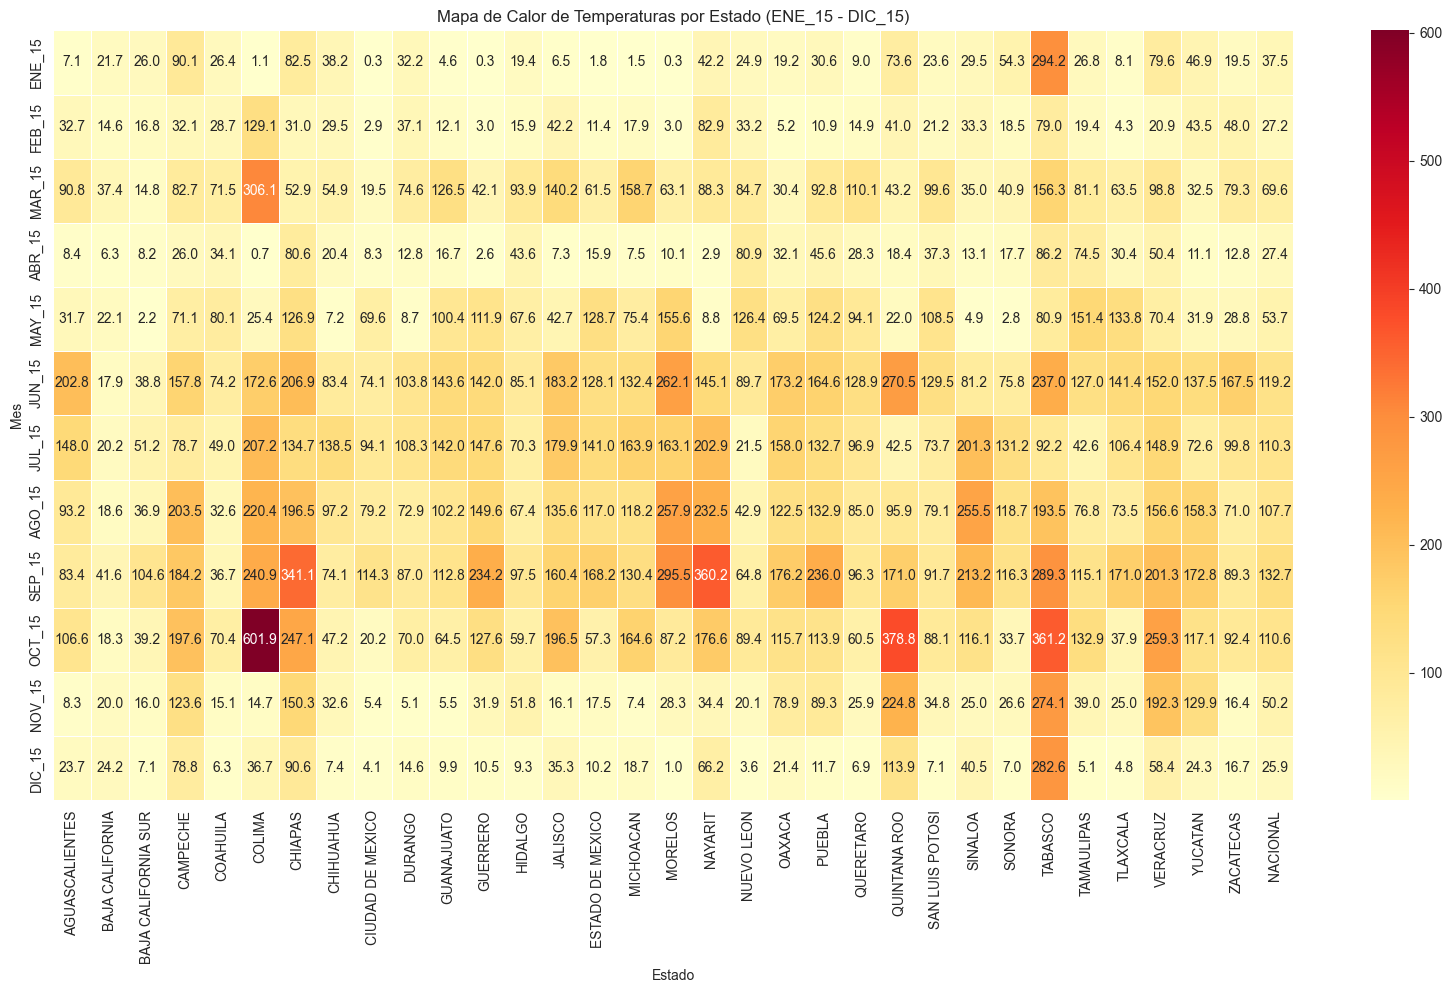

In [55]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_15", "FEB_15", "MAR_15", "ABR_15", "MAY_15", "JUN_15", "JUL_15", "AGO_15", "SEP_15", "OCT_15", "NOV_15", "DIC_15"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Temperaturas por Estado (ENE_15 - DIC_15)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_14836\375882746.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


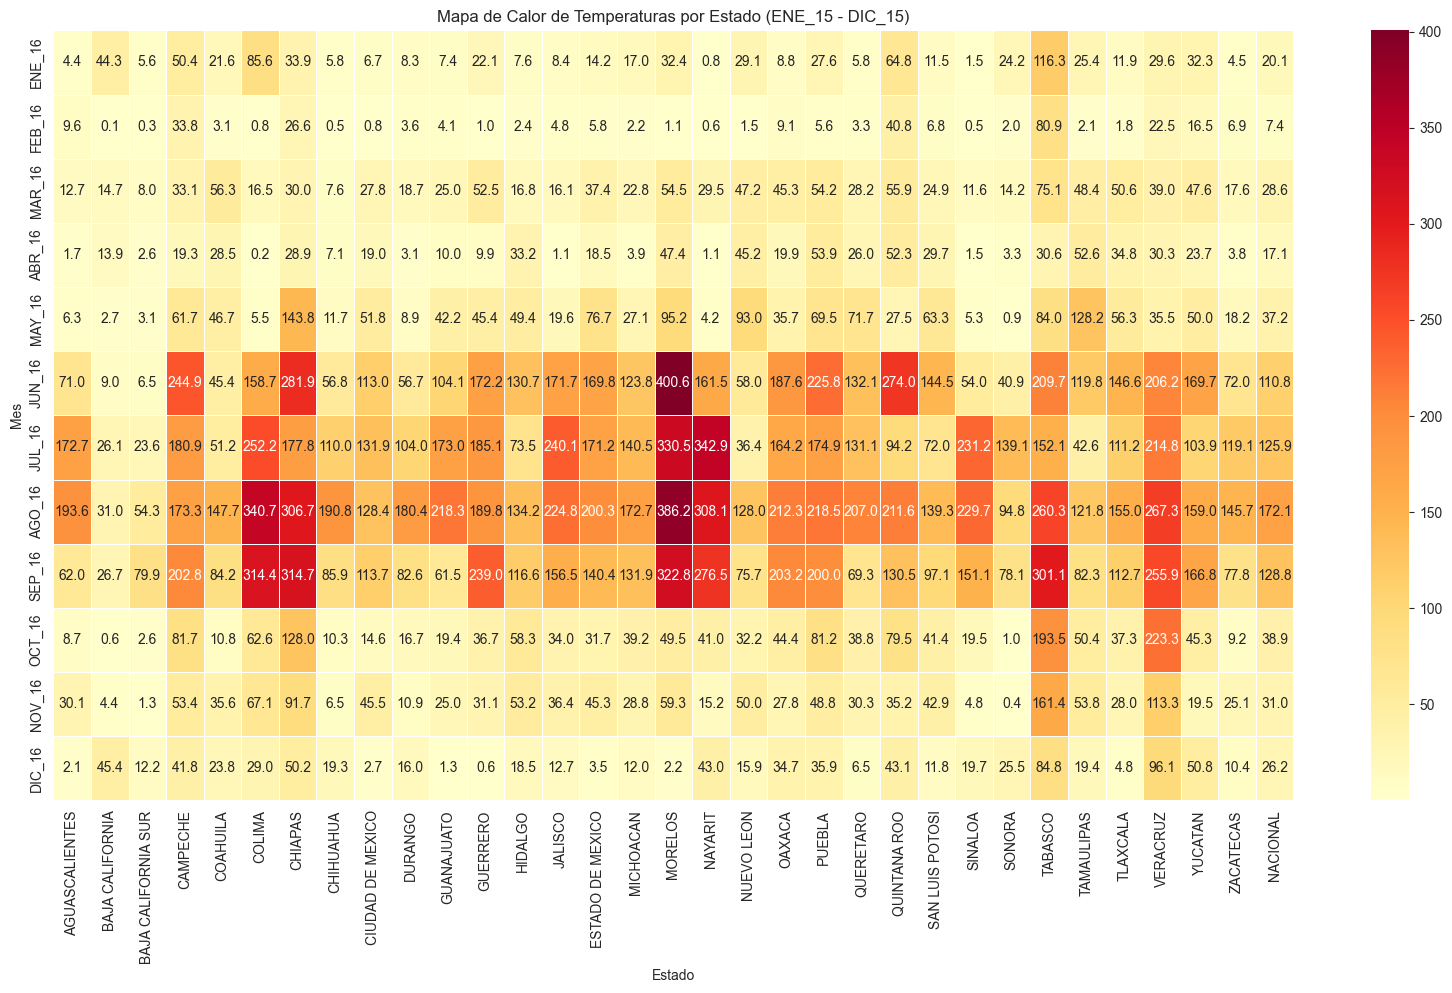

In [56]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_16", "FEB_16", "MAR_16", "ABR_16", "MAY_16", "JUN_16", "JUL_16", "AGO_16", "SEP_16", "OCT_16", "NOV_16", "DIC_16"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Temperaturas por Estado (ENE_15 - DIC_15)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_14836\1394040746.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


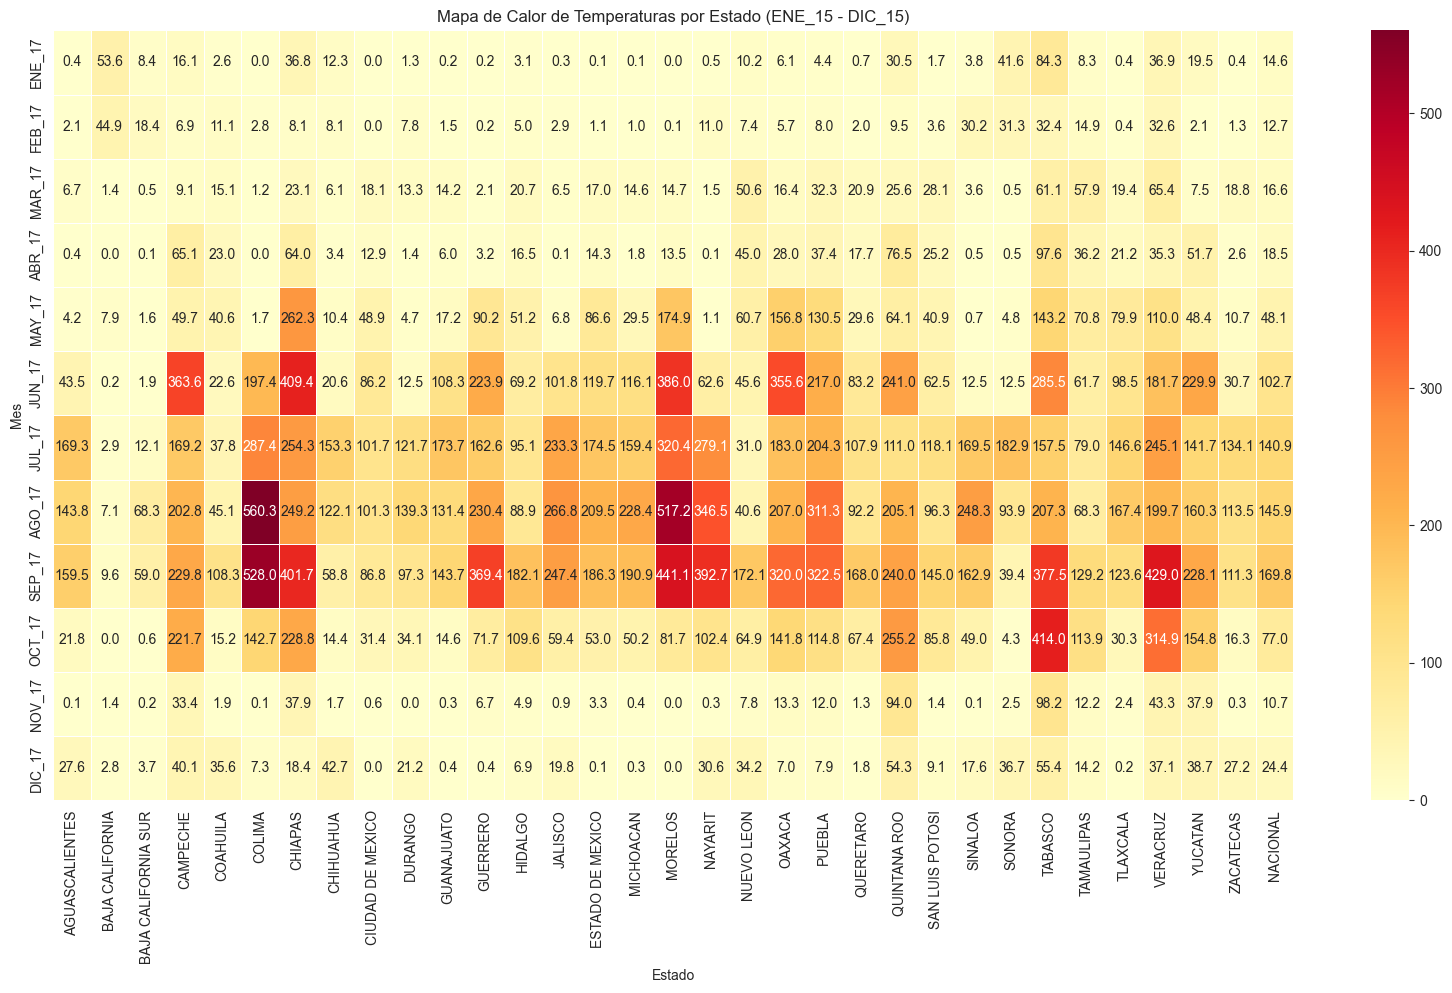

In [59]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_17", "FEB_17", "MAR_17", "ABR_17", "MAY_17", "JUN_17", "JUL_17", "AGO_17", "SEP_17", "OCT_17", "NOV_17", "DIC_17"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Temperaturas por Estado (ENE_15 - DIC_15)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_14836\1067546111.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


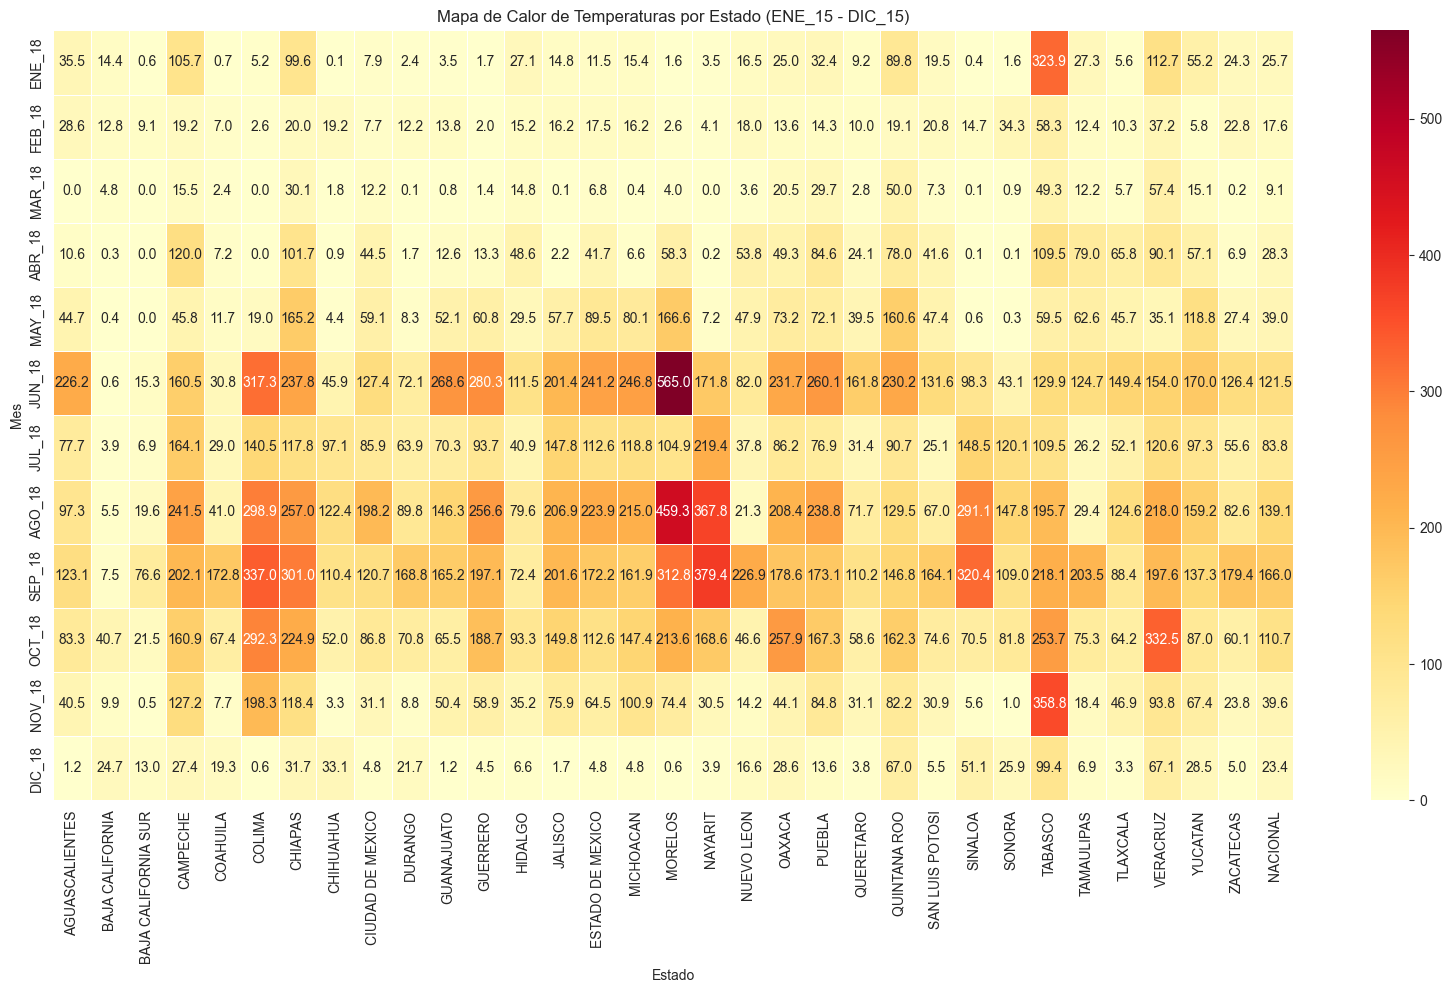

In [60]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_18", "FEB_18", "MAR_18", "ABR_18", "MAY_18", "JUN_18", "JUL_18", "AGO_18", "SEP_18", "OCT_18", "NOV_18", "DIC_18"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Temperaturas por Estado (ENE_15 - DIC_15)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_14836\2617083139.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


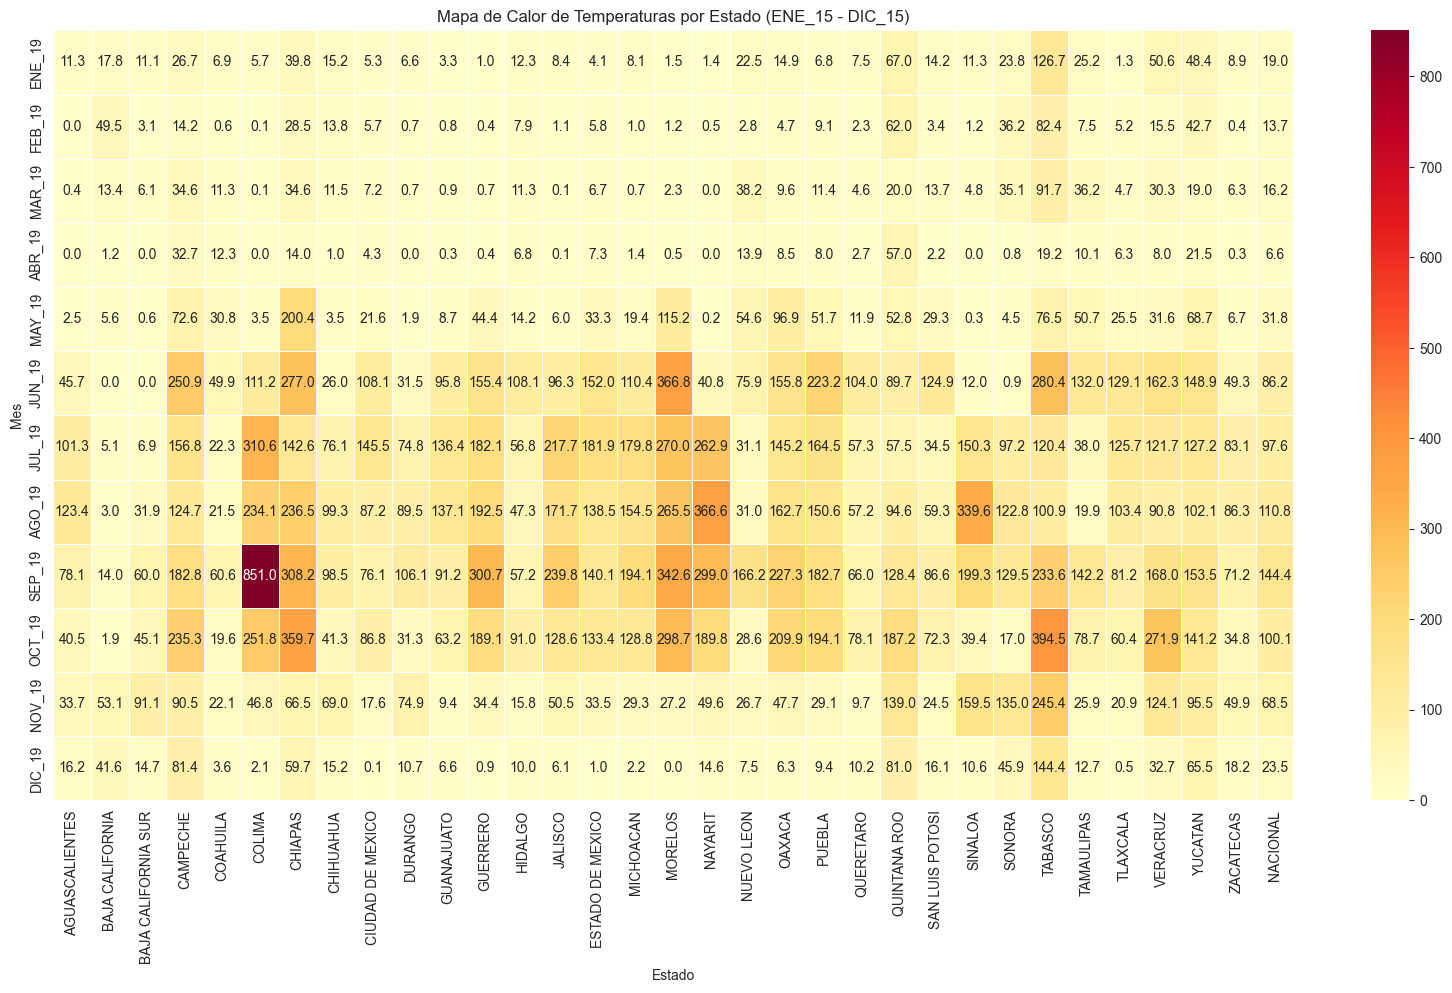

In [61]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_19", "FEB_19", "MAR_19", "ABR_19", "MAY_19", "JUN_19", "JUL_19", "AGO_19", "SEP_19", "OCT_19", "NOV_19", "DIC_19"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Temperaturas por Estado (ENE_15 - DIC_15)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_14836\1435374563.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


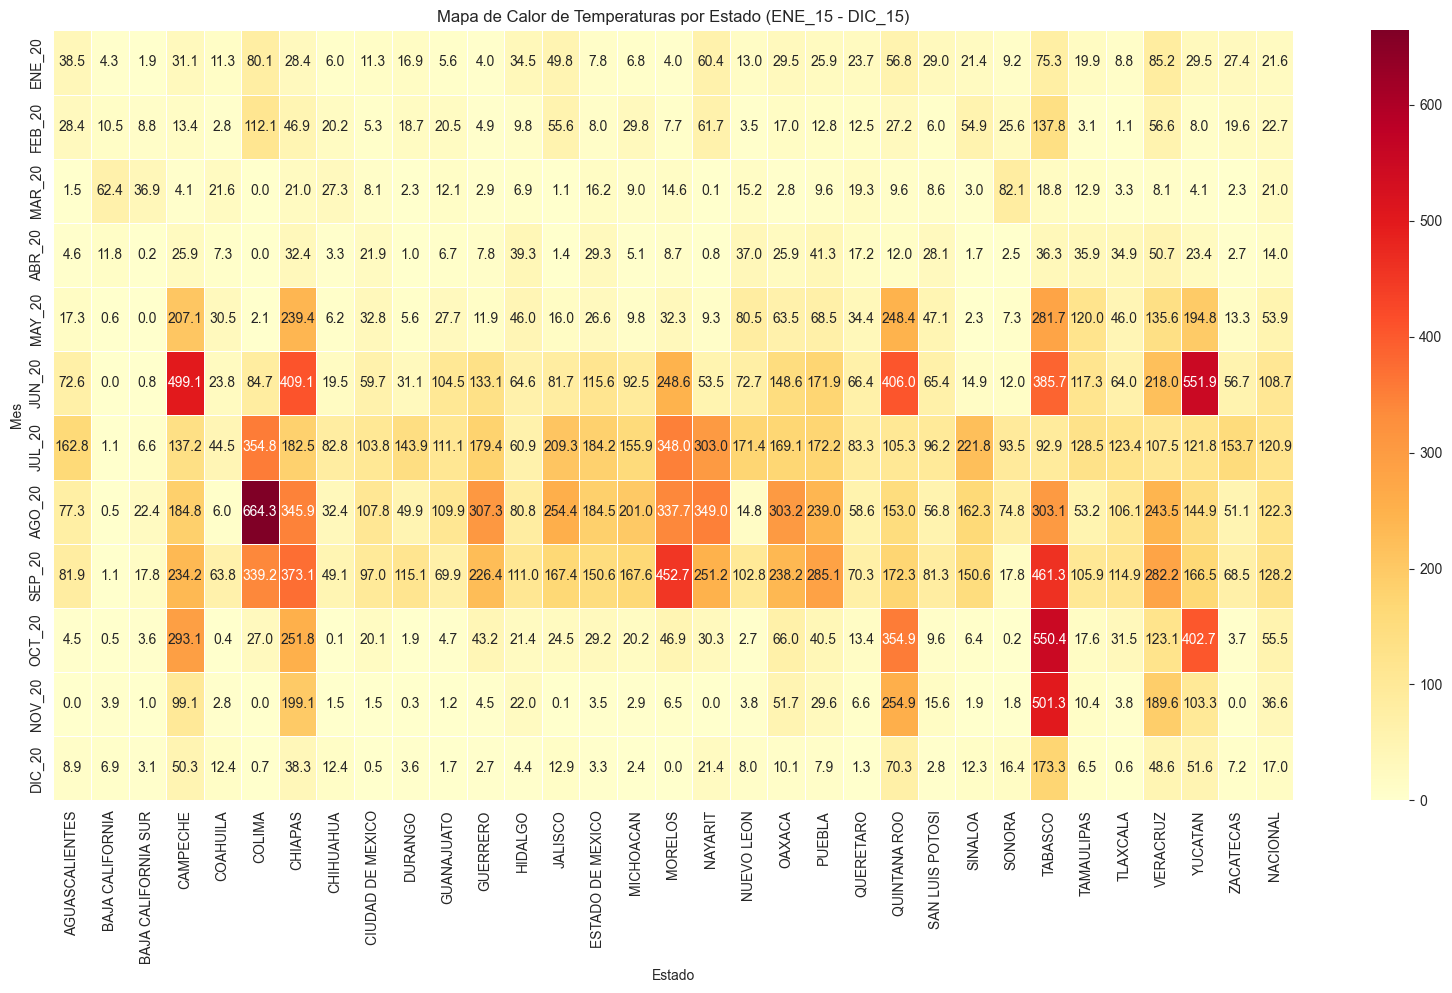

In [62]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_20", "FEB_20", "MAR_20", "ABR_20", "MAY_20", "JUN_20", "JUL_20", "AGO_20", "SEP_20", "OCT_20", "NOV_20", "DIC_20"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Temperaturas por Estado (ENE_15 - DIC_15)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_14836\1945137041.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


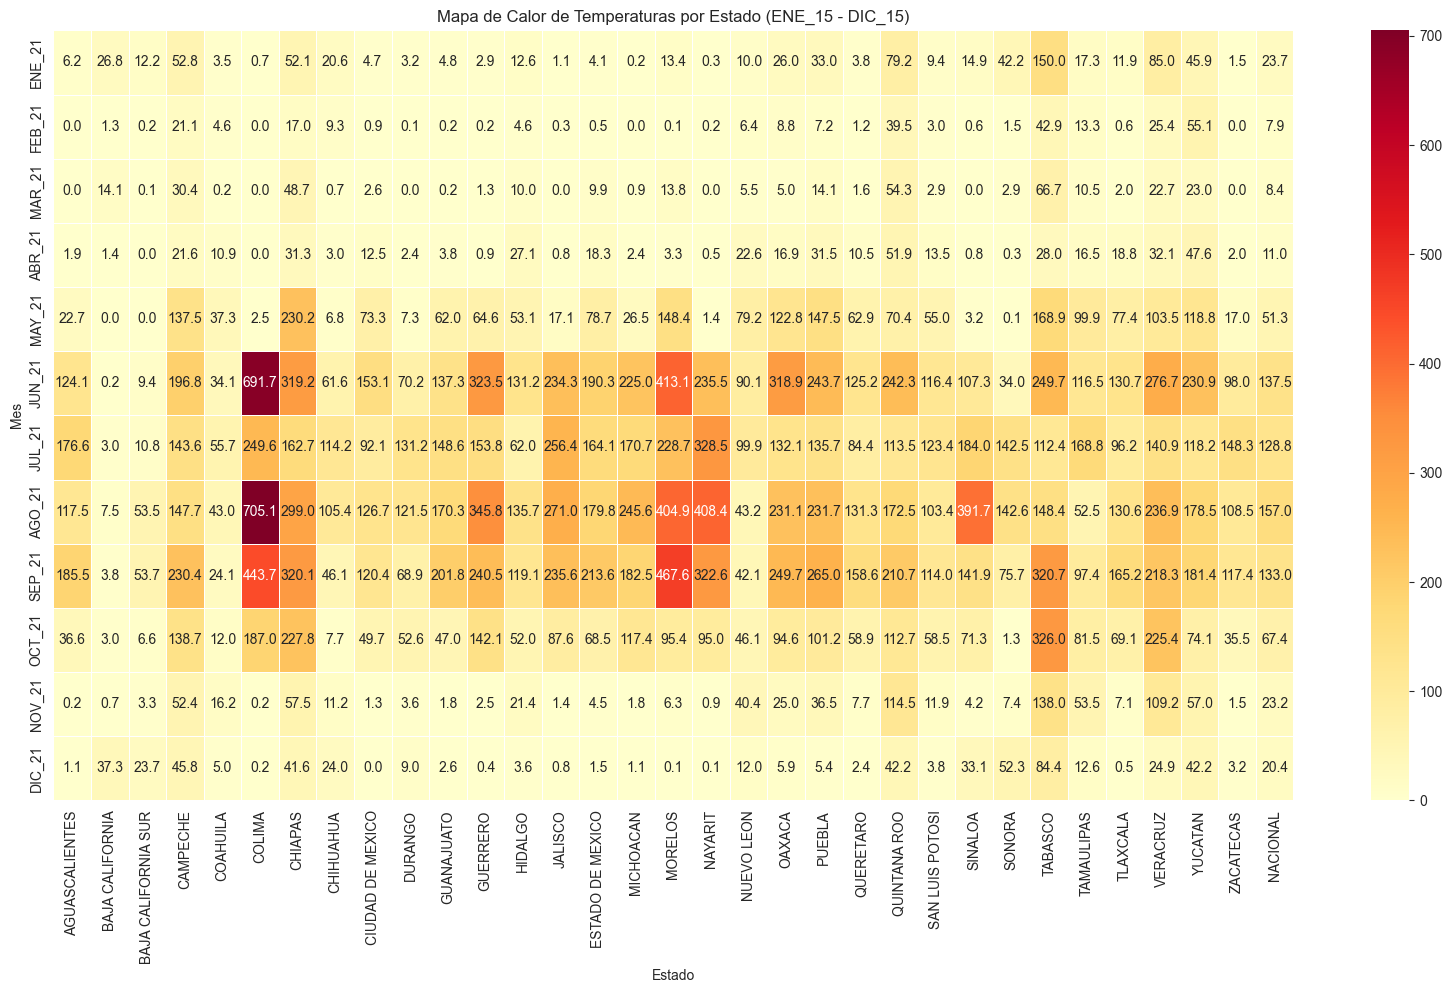

In [63]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_21", "FEB_21", "MAR_21", "ABR_21", "MAY_21", "JUN_21", "JUL_21", "AGO_21", "SEP_21", "OCT_21", "NOV_21", "DIC_21"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Temperaturas por Estado (ENE_15 - DIC_15)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

C:\Users\him_6\AppData\Local\Temp\ipykernel_14836\3934028188.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["ESTADO"] = precip["ENTIDAD_15"]


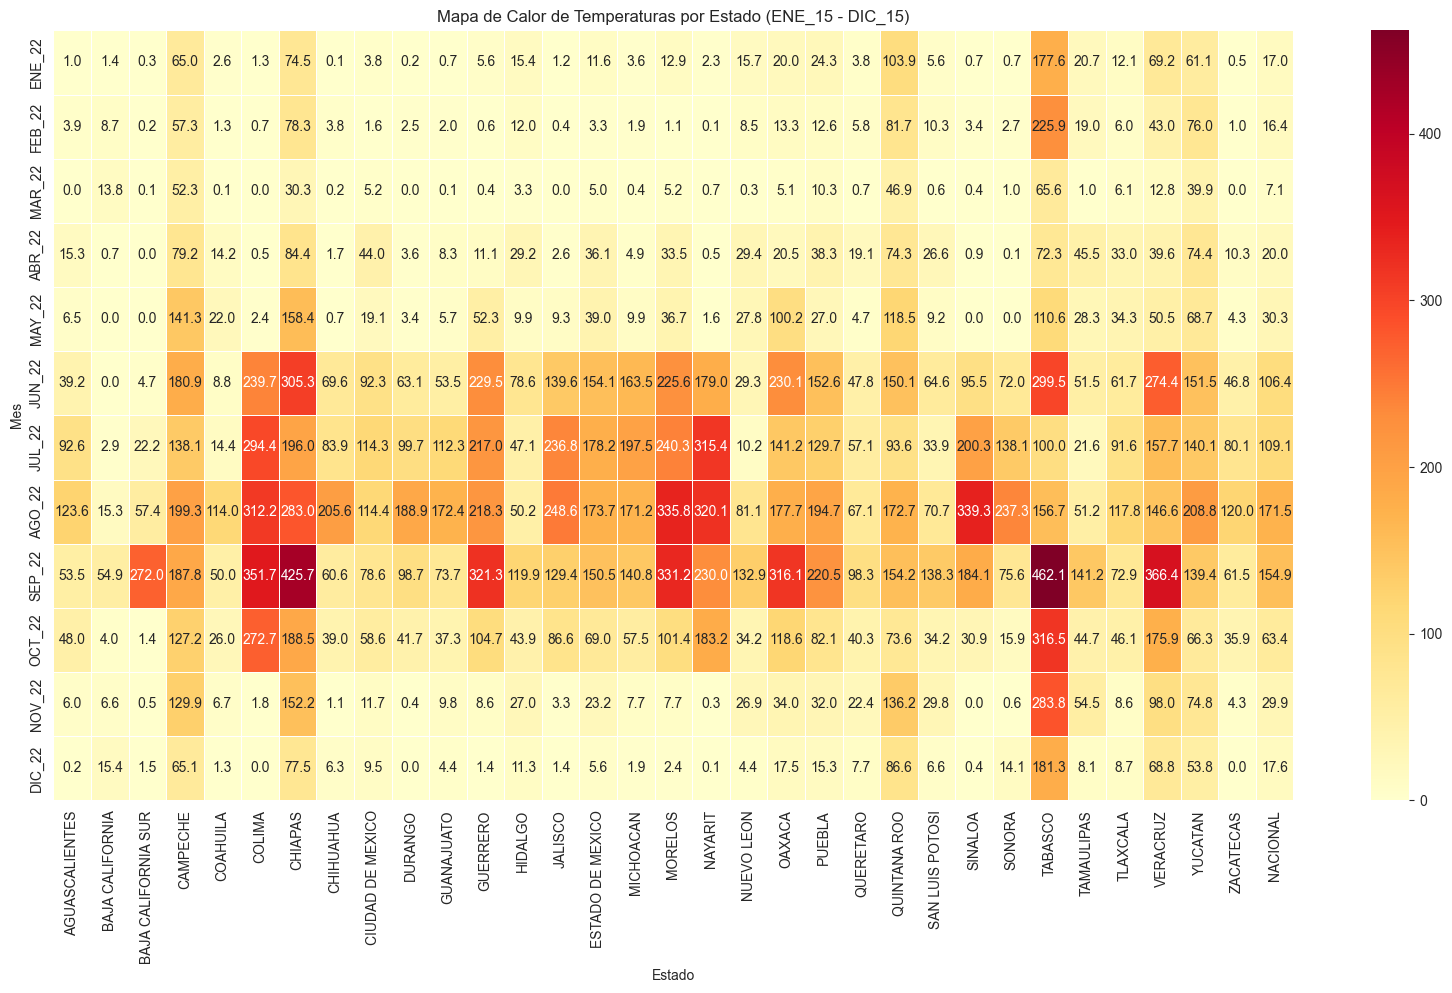

In [57]:
# Selecciona las columnas de enero de 2015 a diciembre de 2015
columns_to_plot = ["ENE_22", "FEB_22", "MAR_22", "ABR_22", "MAY_22", "JUN_22", "JUL_22", "AGO_22", "SEP_22", "OCT_22", "NOV_22", "DIC_22"]

# DataFrame con las columnas seleccionadas
subset_df = precip[columns_to_plot]

# Añade una columna "ESTADO" al DataFrame con los nombres de los estados
subset_df["ESTADO"] = precip["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los meses en el eje y
subset_df = subset_df.set_index("ESTADO").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Temperaturas por Estado (ENE_15 - DIC_15)")
plt.xlabel("Estado")
plt.ylabel("Mes")

# Muestra el gráfico
plt.show()

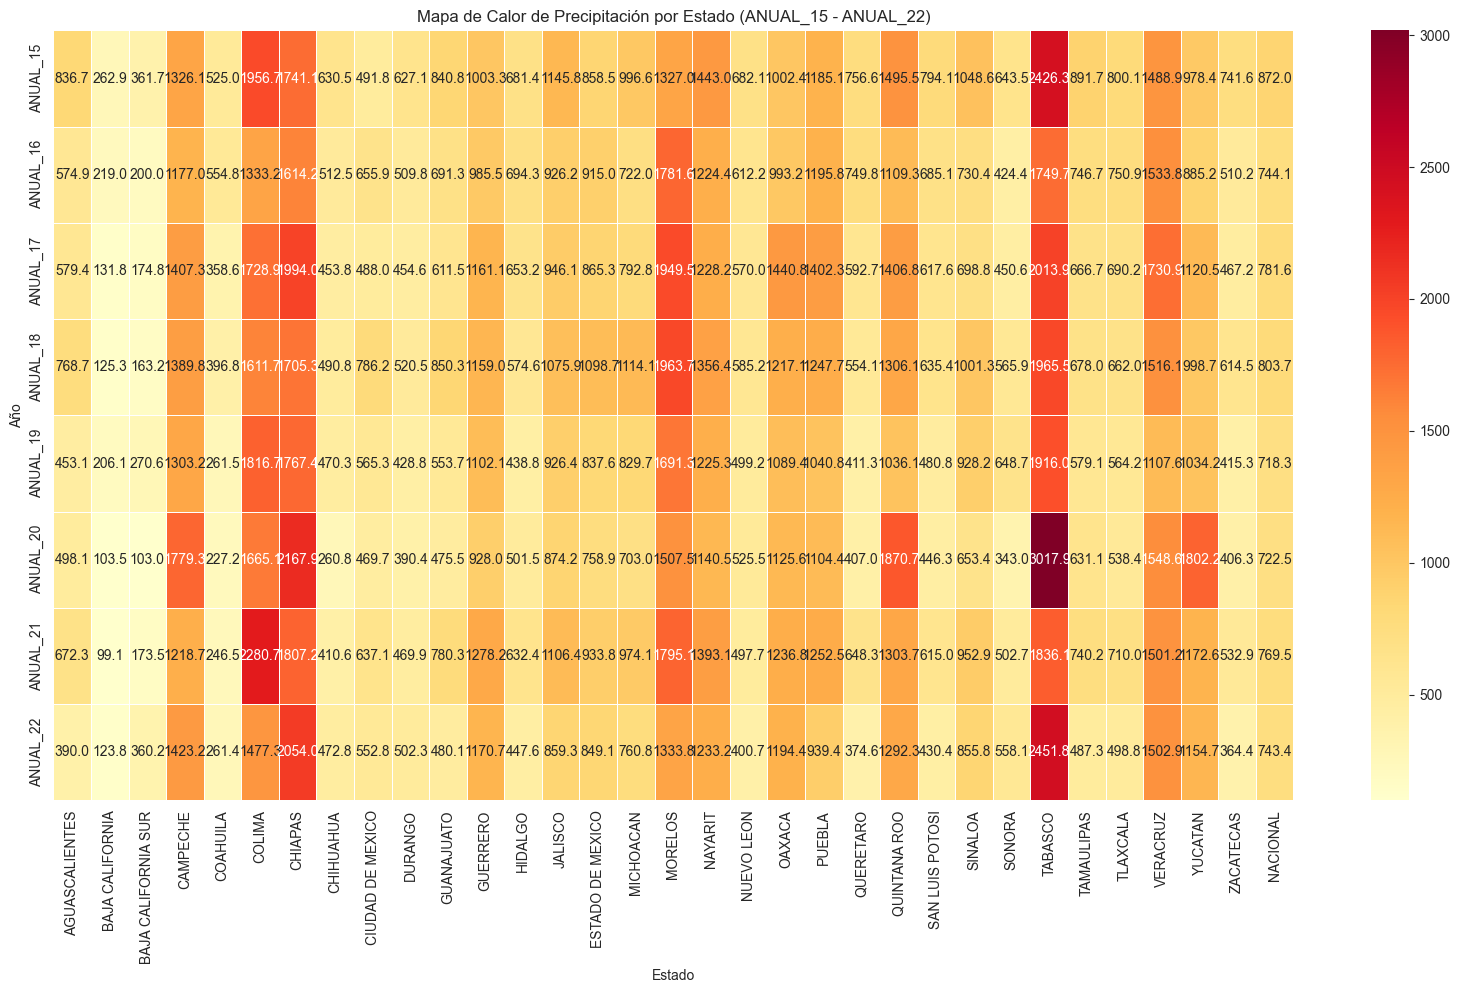

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  columnas que quieres seleccionar (ANUAL_15 a ANUAL_22)
columns_to_plot = ["ANUAL_15", "ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]

# DataFrame con las columnas seleccionadas
subset_df = df[columns_to_plot]

# Añade una columna "ENTIDAD_15" al DataFrame con los nombres de los estados
subset_df["ENTIDAD_15"] = df["ENTIDAD_15"]

# Transpone el DataFrame para que los estados estén en el eje x y los años en el eje y
subset_df = subset_df.set_index("ENTIDAD_15").T

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 10))

# mapa de calor con Seaborn
sns.heatmap(subset_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".1f")

# Configura el título y los ejes
plt.title("Mapa de Calor de Precipitación por Estado (ANUAL_15 - ANUAL_22)")
plt.xlabel("Estado")
plt.ylabel("Año")

# Muestra el gráfico
plt.show()


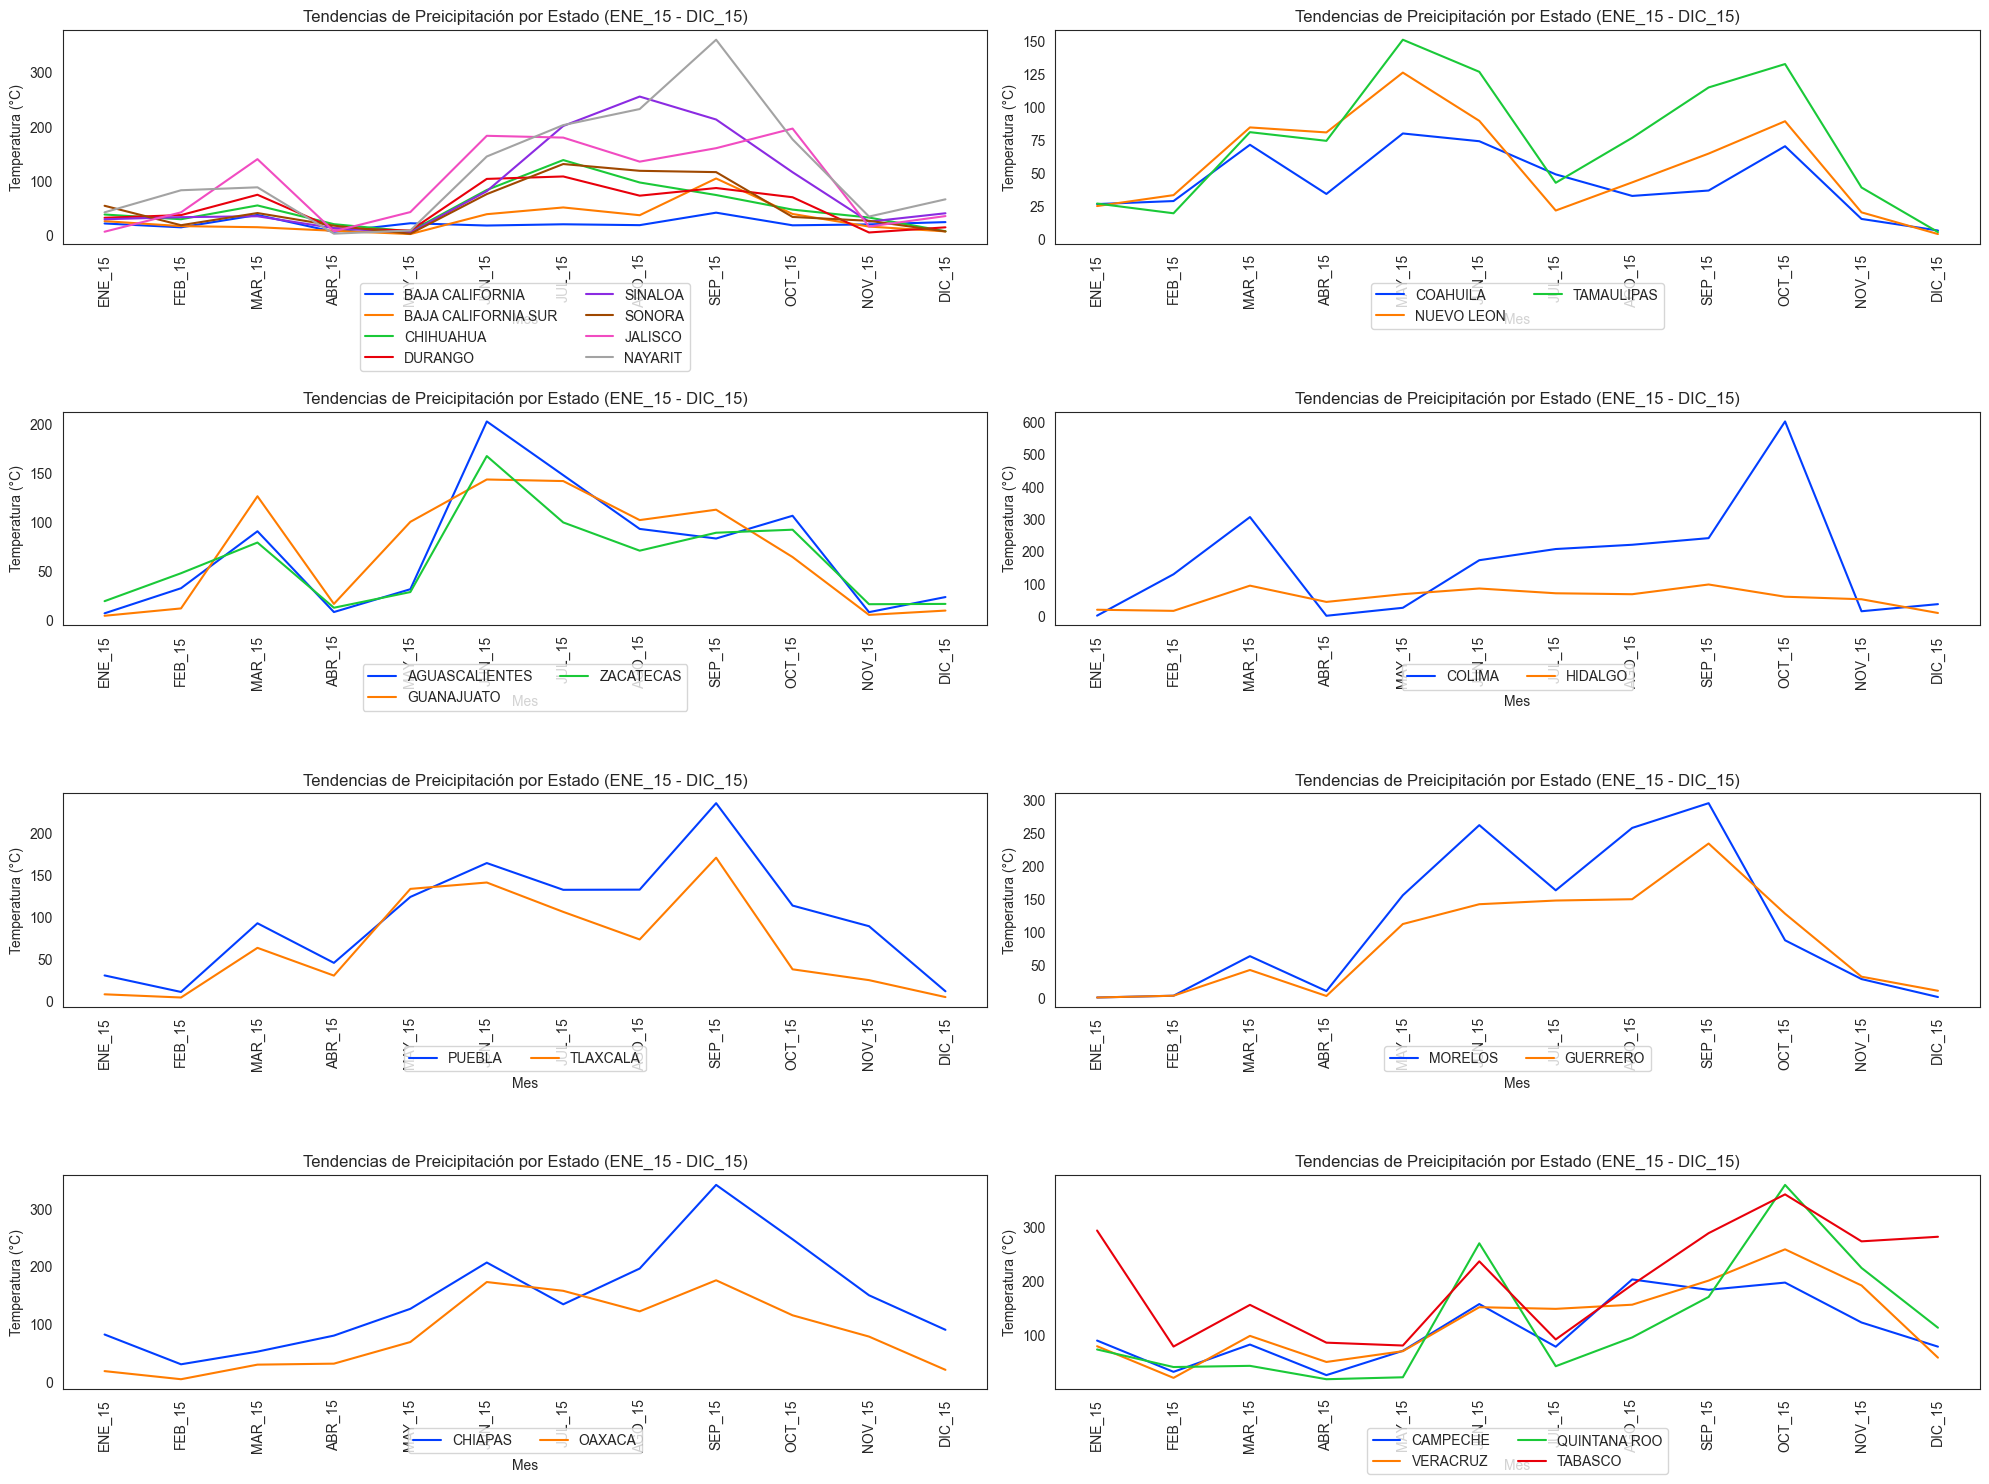

In [31]:
# Lista de estados en cada región
regiones = {
    'Región Noroeste': ['BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'CHIHUAHUA', 'DURANGO', 'SINALOA', 'SONORA', 'JALISCO', 'NAYARIT'],
    'Región Noreste':  ["COAHUILA", "NUEVO LEON", "TAMAULIPAS"],
    'Centro Norte': ['AGUASCALIENTES', 'GUANAJUATO', 'QUERÉTARO', 'SAN LUIS POTOSÍ', 'ZACATECAS'],
    'Centro Occidente': ['COLIMA', 'MICHOACÁN', "ESTADO DE MÉXICO", 'HIDALGO'],
    'Centro Oriente': ['PUEBLA', 'TLAXCALA'],
    "Centro Sur": ["CIUDAD DE MÉXICO", "MORELOS", "GUERRERO"],
    "Suroeste": ["CHIAPAS", "OAXACA"],
    "Sureste": ["CAMPECHE", "VERACRUZ", "QUINTANA ROO", "TABASCO", "YUCATÁN"]
}

# Selecciona las columnas de interés (por ejemplo, ENE_15 hasta DIC_15)
columns_to_plot = ["ENE_15", "FEB_15", "MAR_15", "ABR_15", "MAY_15", "JUN_15", "JUL_15", "AGO_15", "SEP_15", "OCT_15", "NOV_15", "DIC_15"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Preicipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Temperatura (°C)")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()





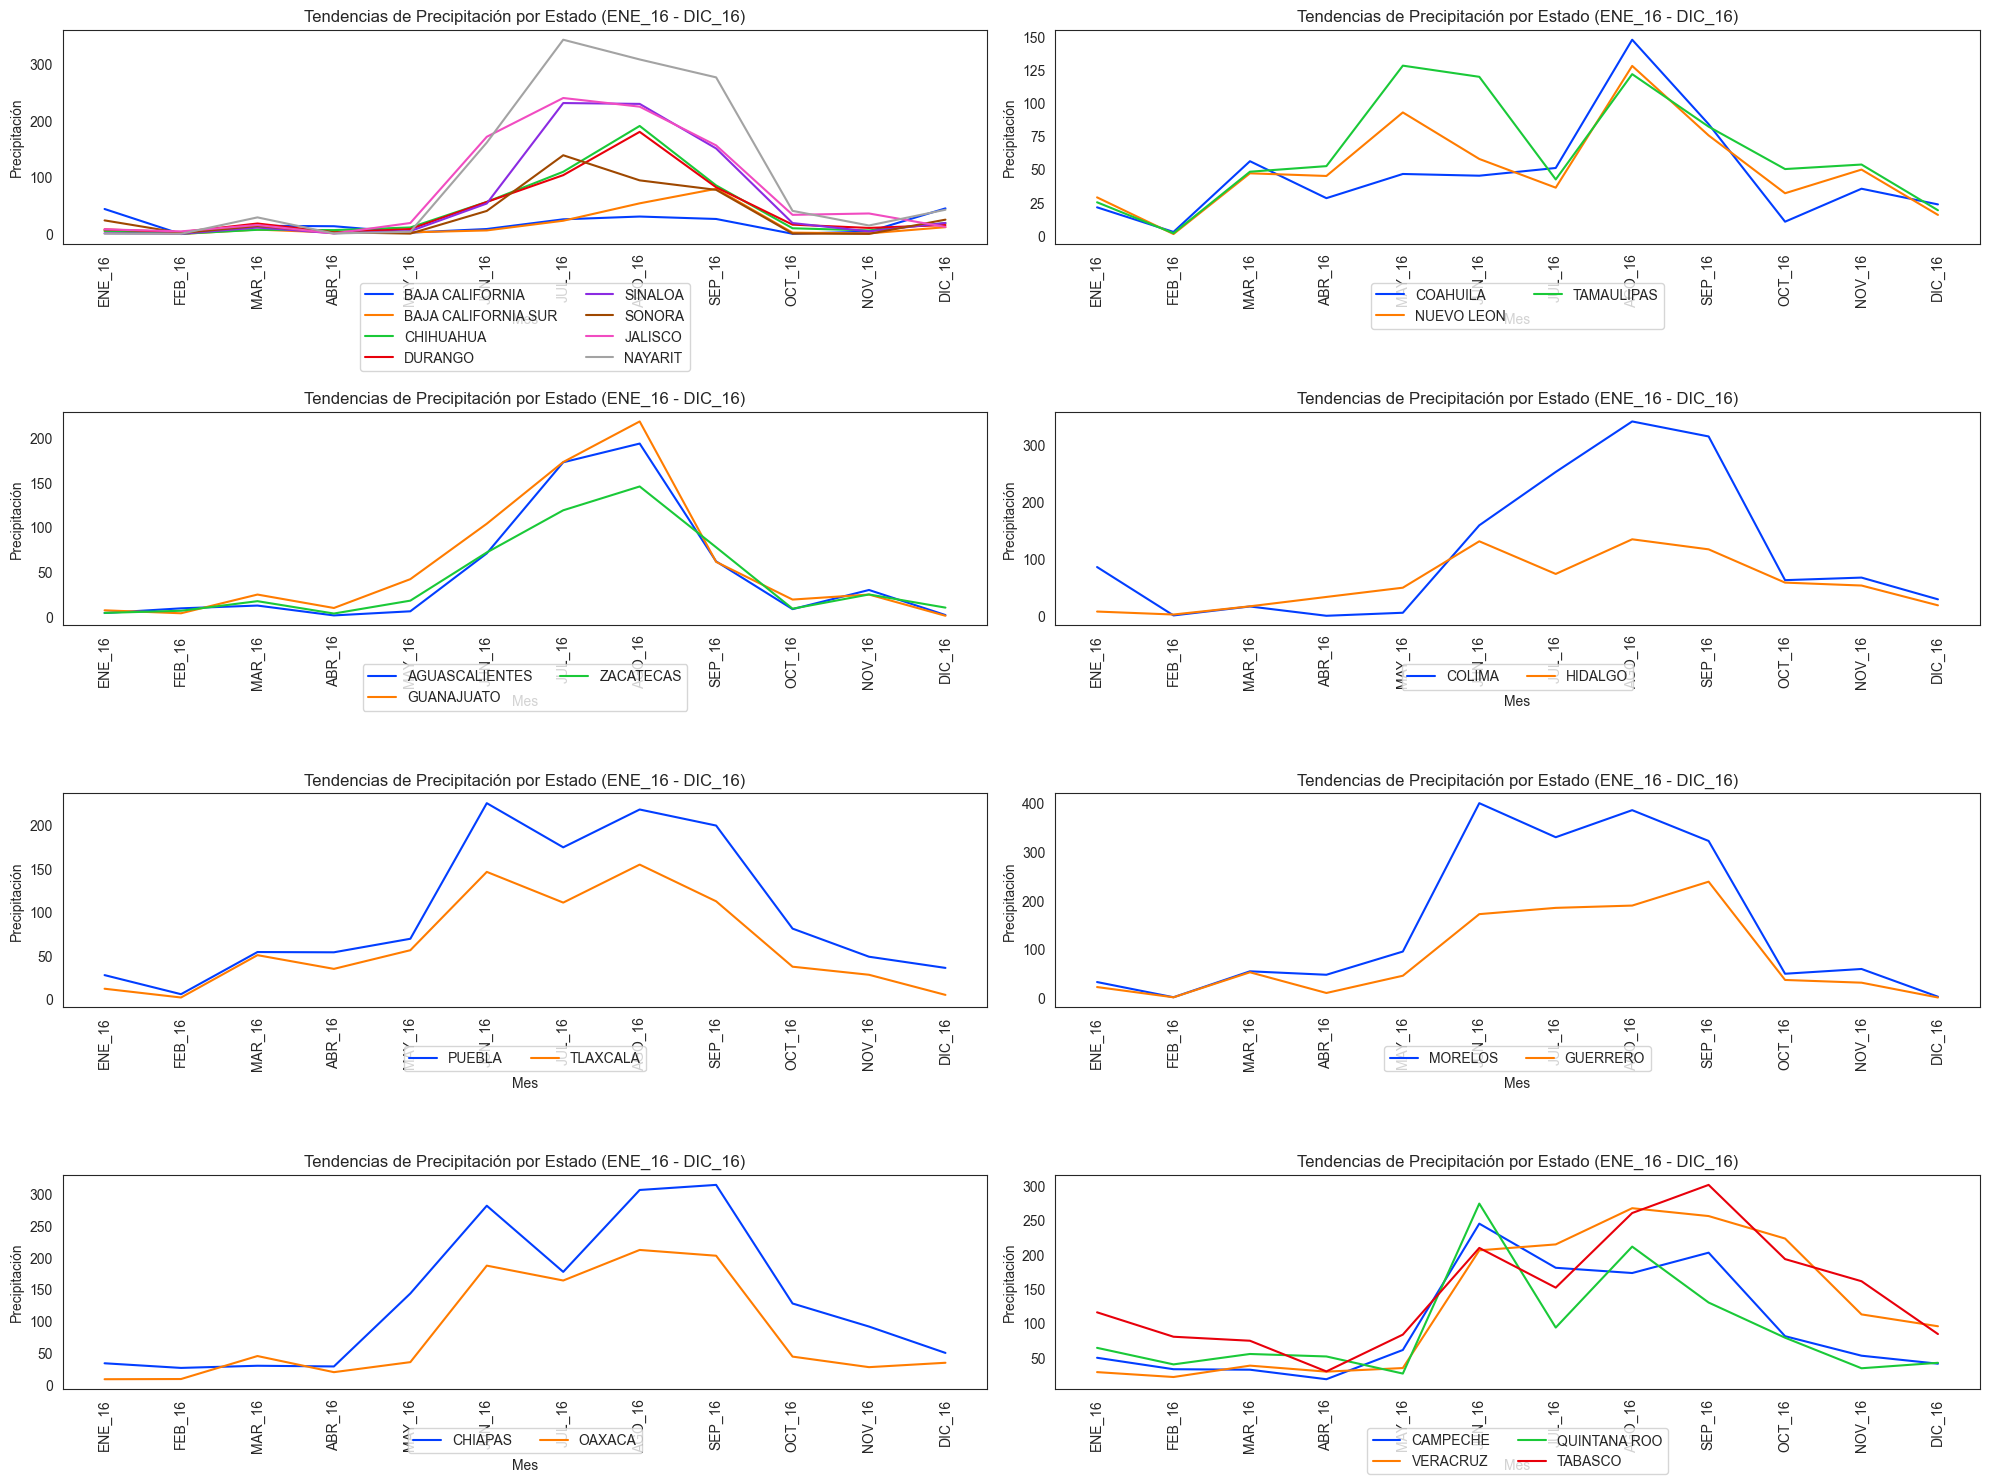

In [38]:
# Selecciona las columnas de interés (por ejemplo, ENE_16 hasta DIC_16)
columns_to_plot = ["ENE_16", "FEB_16", "MAR_16", "ABR_16", "MAY_16", "JUN_16", "JUL_16", "AGO_16", "SEP_16", "OCT_16", "NOV_16", "DIC_16"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()


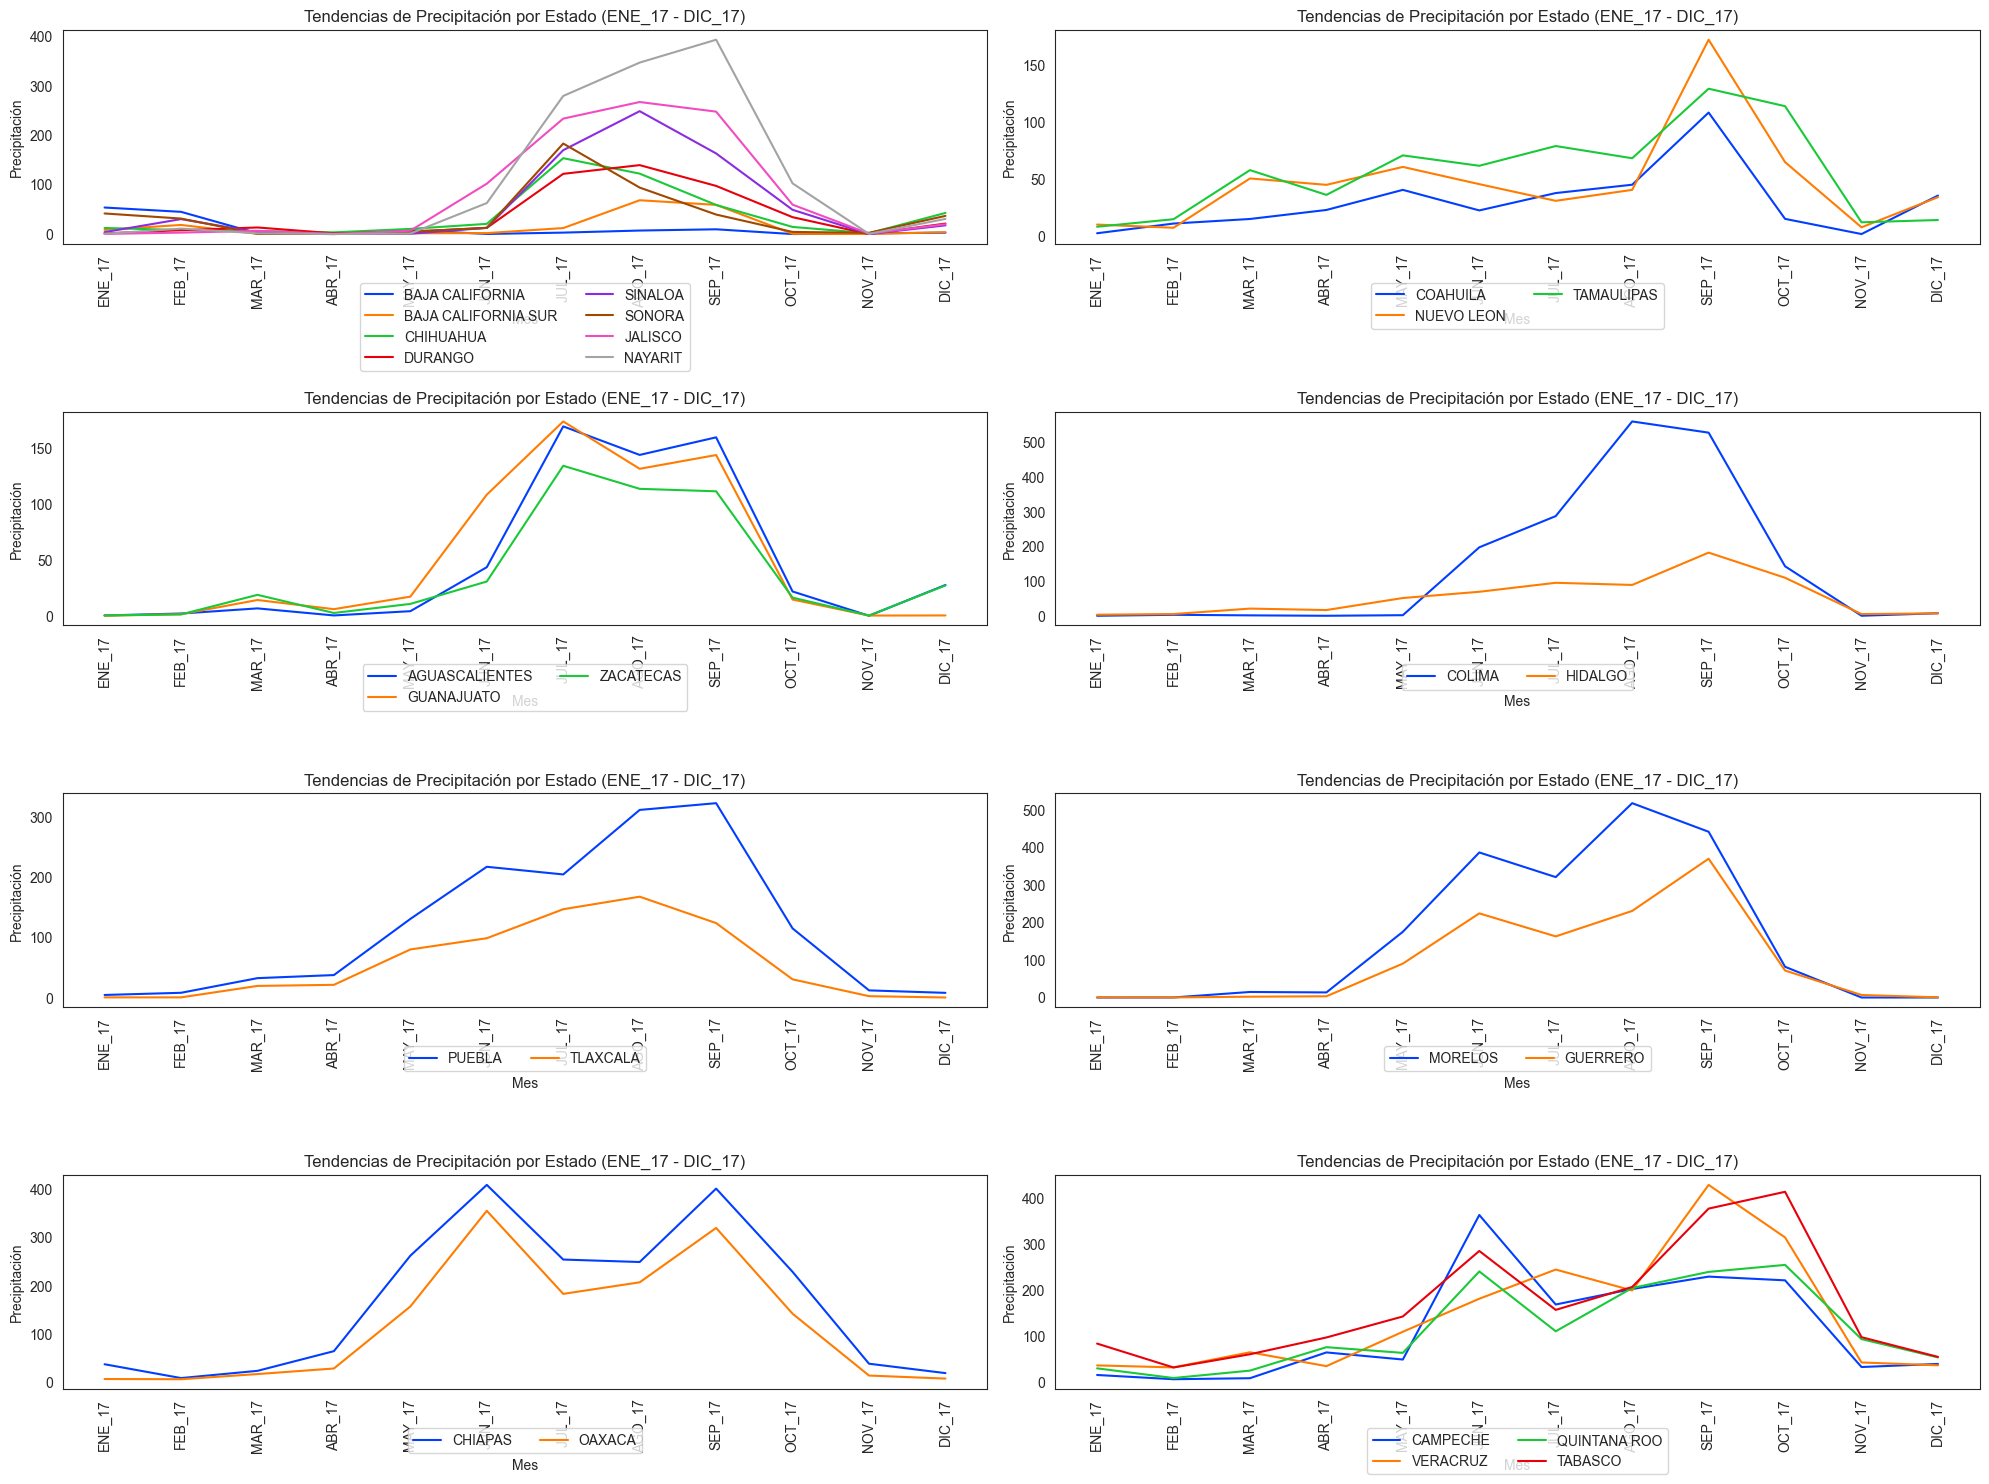

In [40]:
# Selecciona las columnas de interés (por ejemplo, ENE_17 hasta DIC_17)
columns_to_plot = ["ENE_17", "FEB_17", "MAR_17", "ABR_17", "MAY_17", "JUN_17", "JUL_17", "AGO_17", "SEP_17", "OCT_17", "NOV_17", "DIC_17"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()



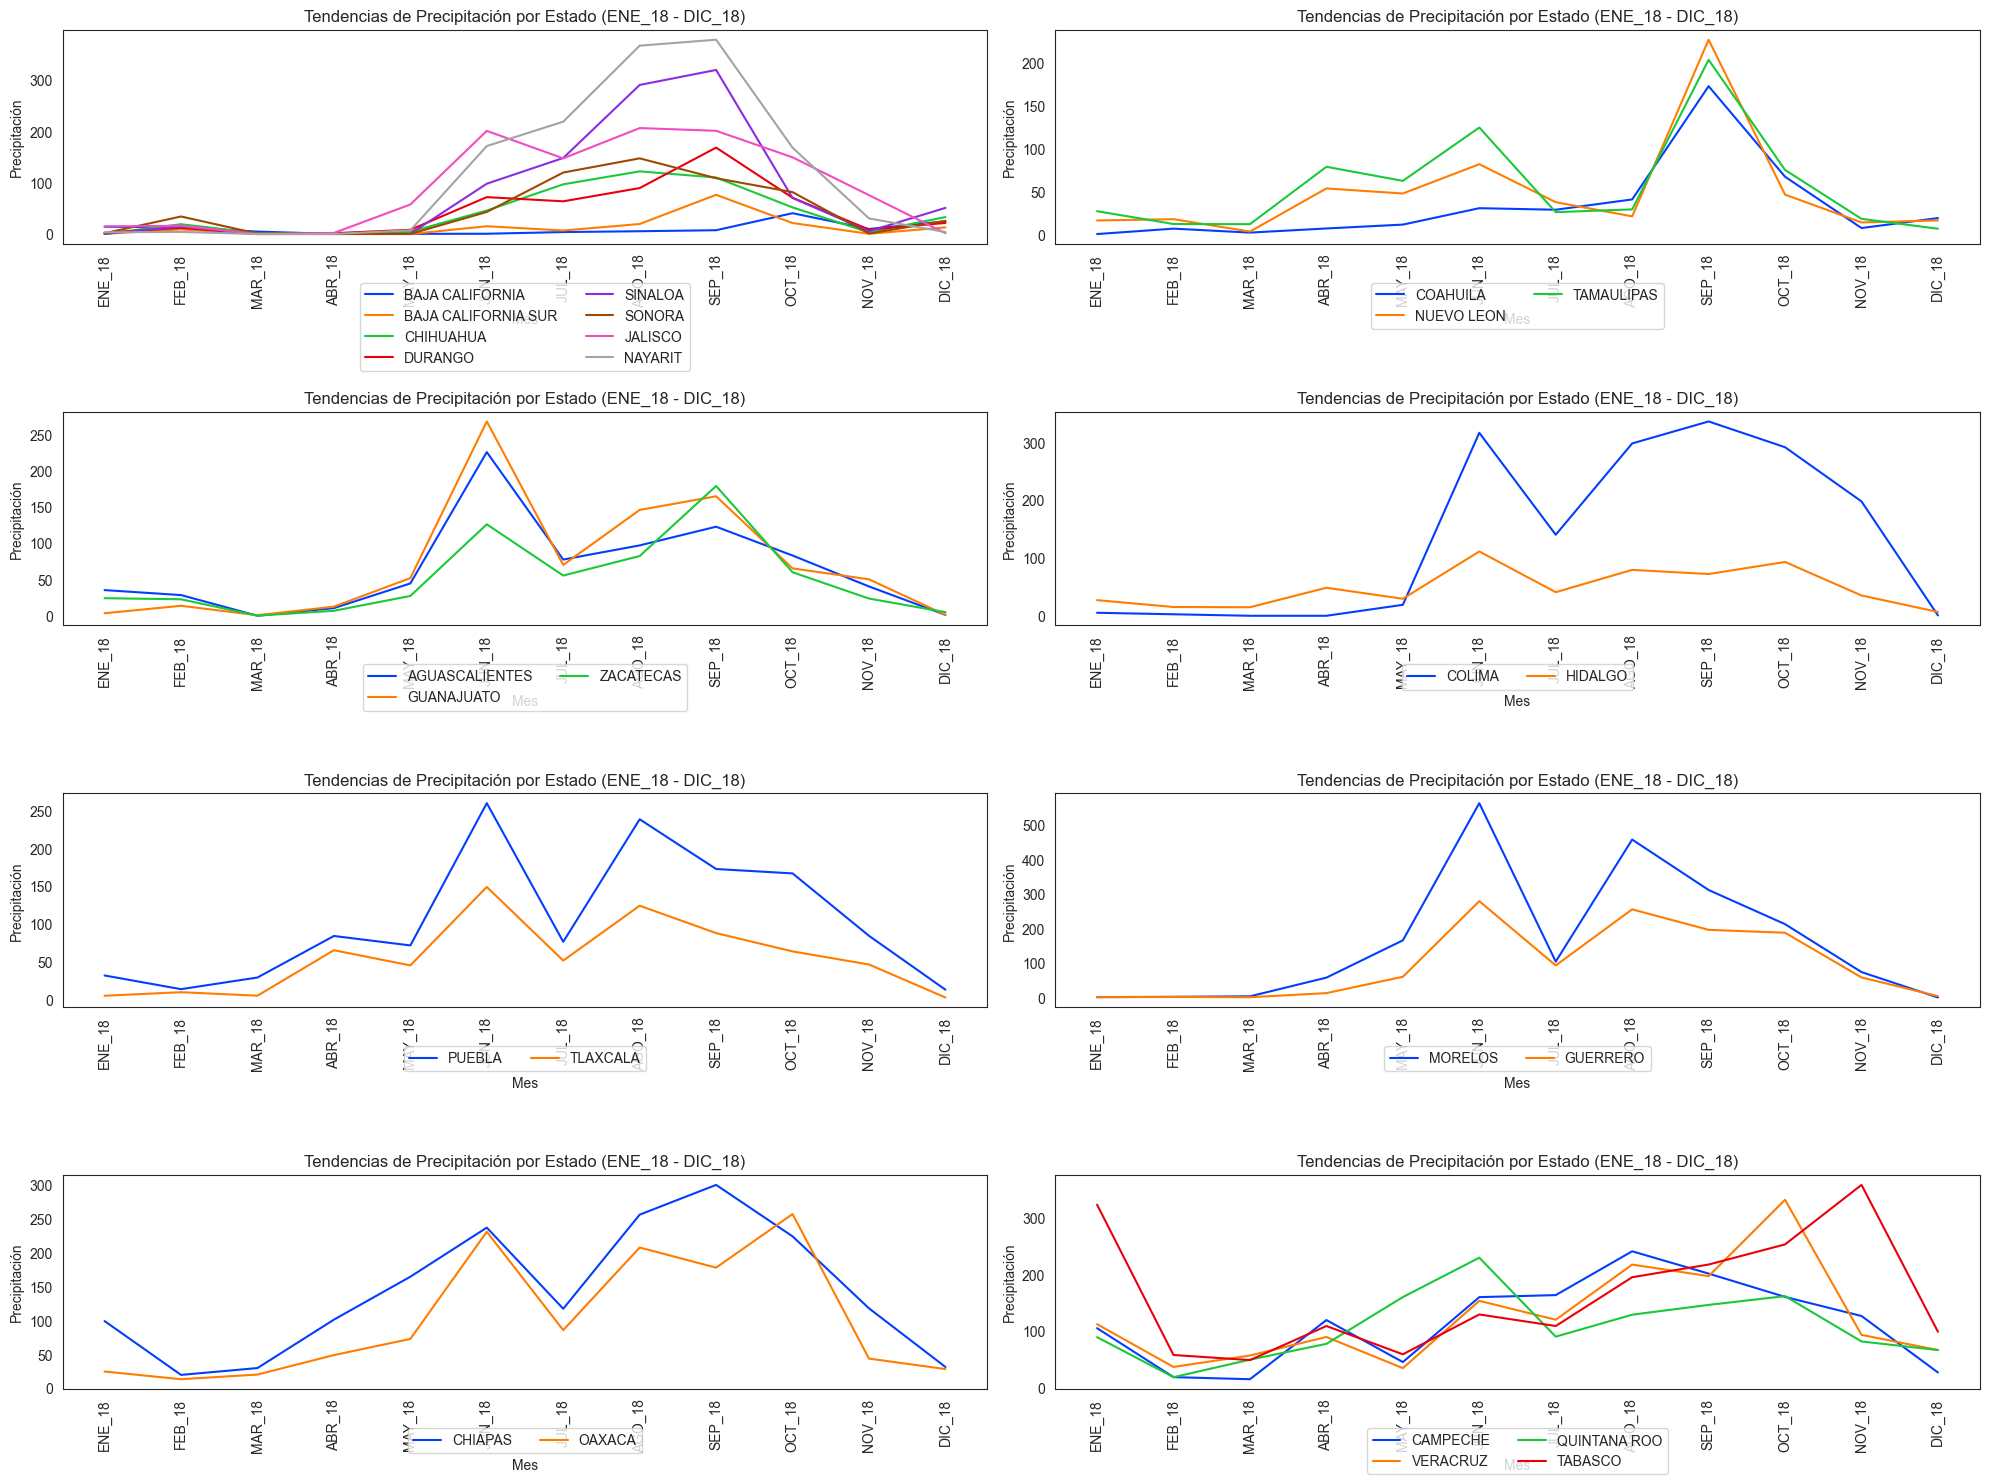

In [43]:
# Selecciona las columnas de interés (por ejemplo, ENE_18 hasta DIC_18)
columns_to_plot = ["ENE_18", "FEB_18", "MAR_18", "ABR_18", "MAY_18", "JUN_18", "JUL_18", "AGO_18", "SEP_18", "OCT_18", "NOV_18", "DIC_18"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()



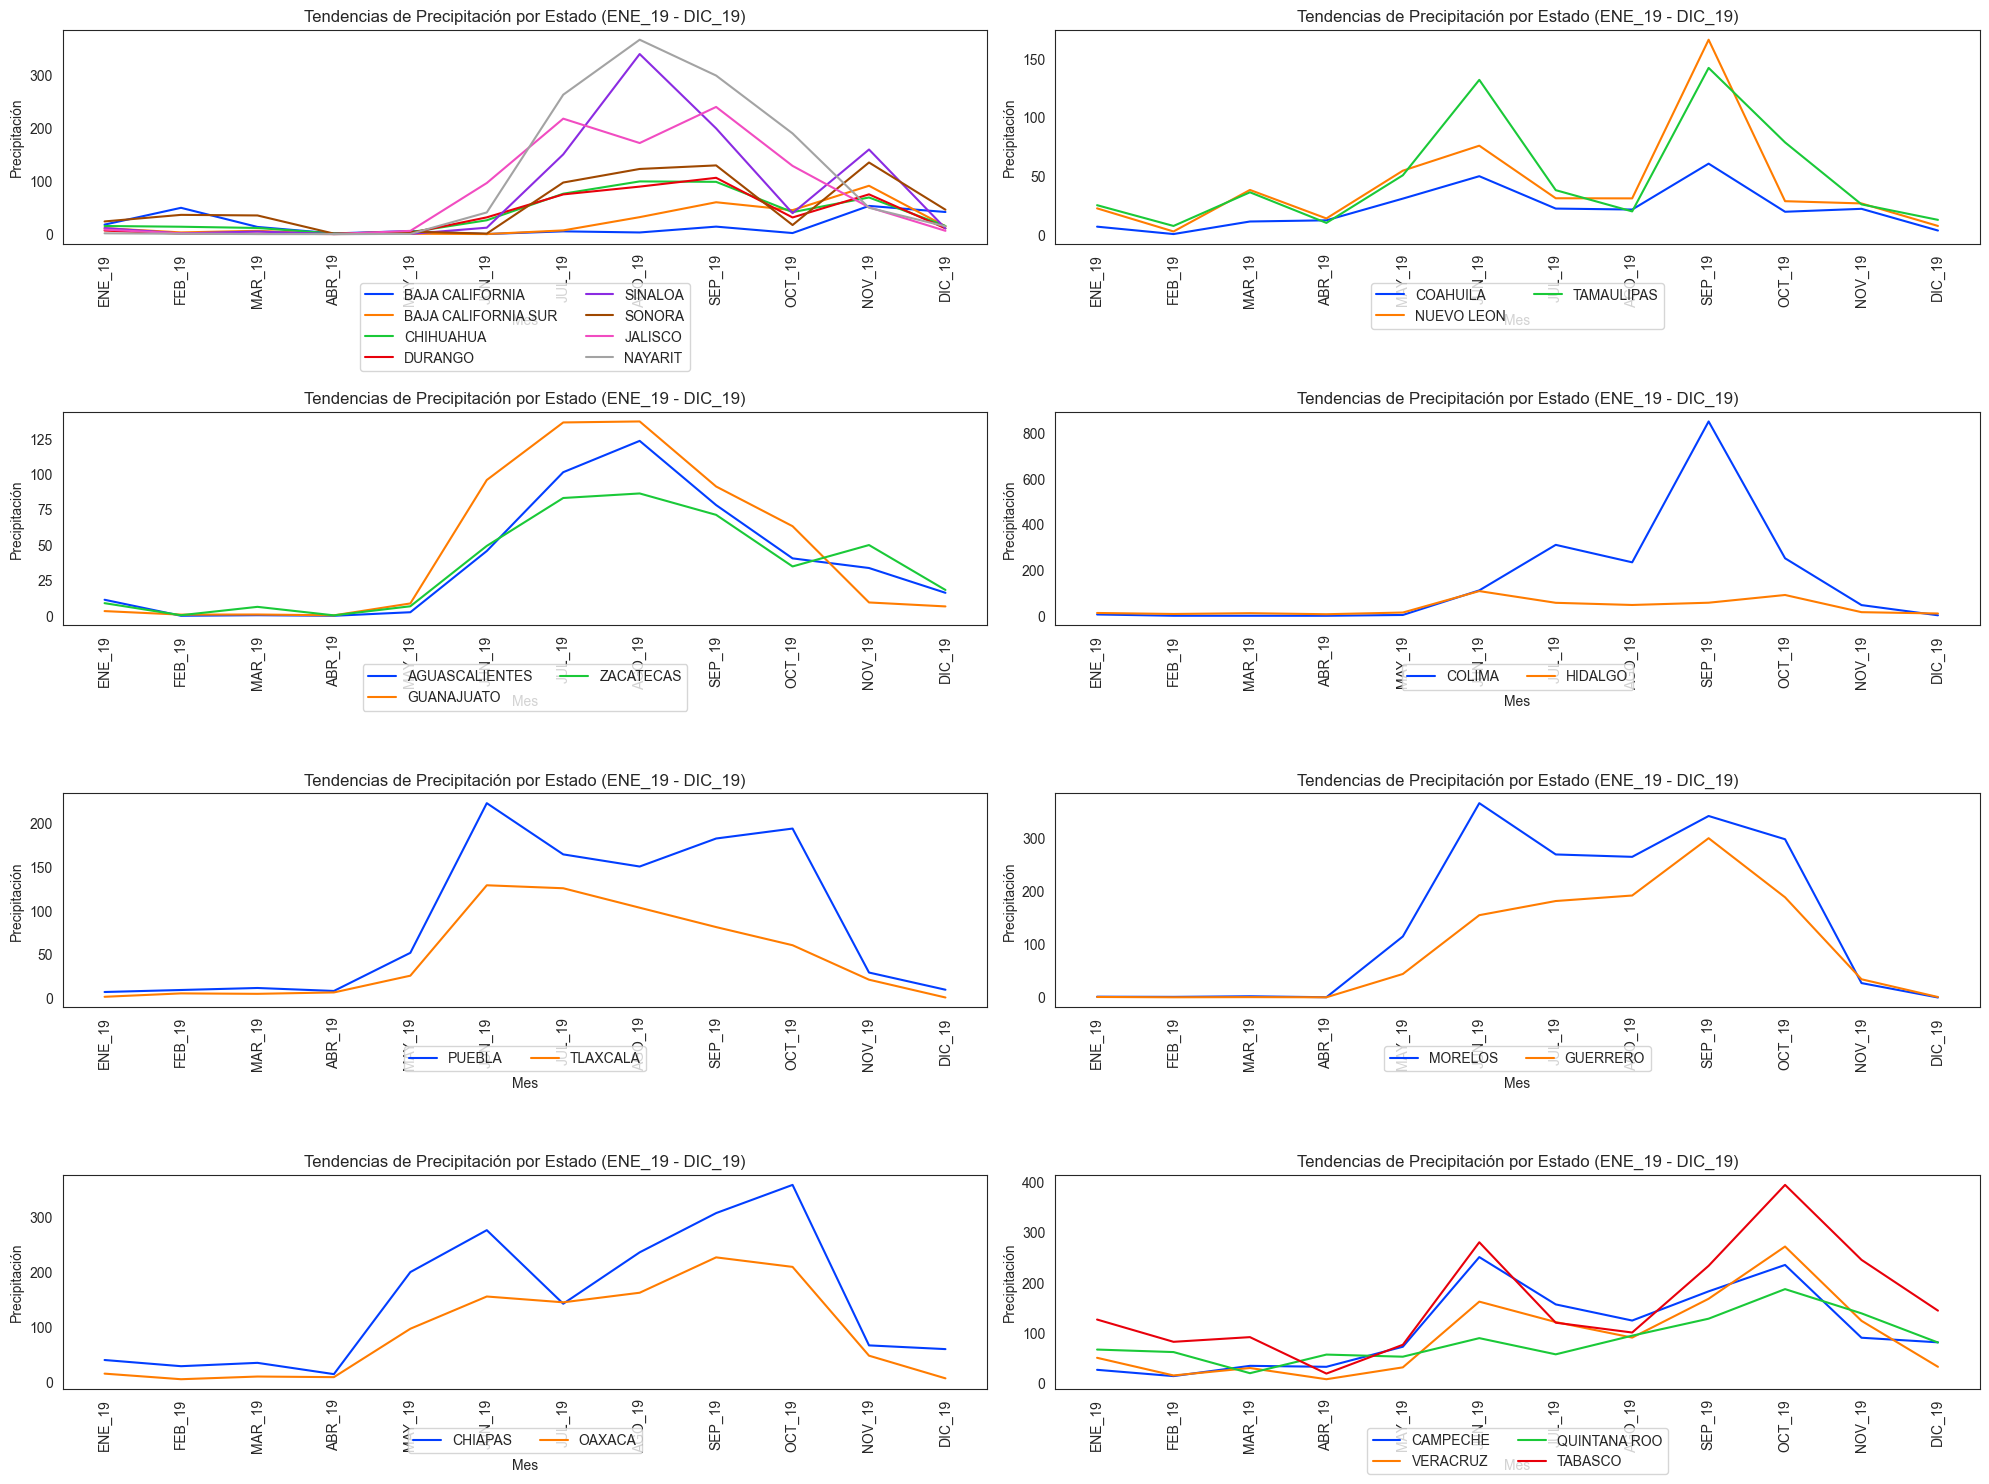

In [44]:
# Selecciona las columnas de interés (por ejemplo, ENE_18 hasta DIC_18)
columns_to_plot = ["ENE_19", "FEB_19", "MAR_19", "ABR_19", "MAY_19", "JUN_19", "JUL_19", "AGO_19", "SEP_19", "OCT_19", "NOV_19", "DIC_19",]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()


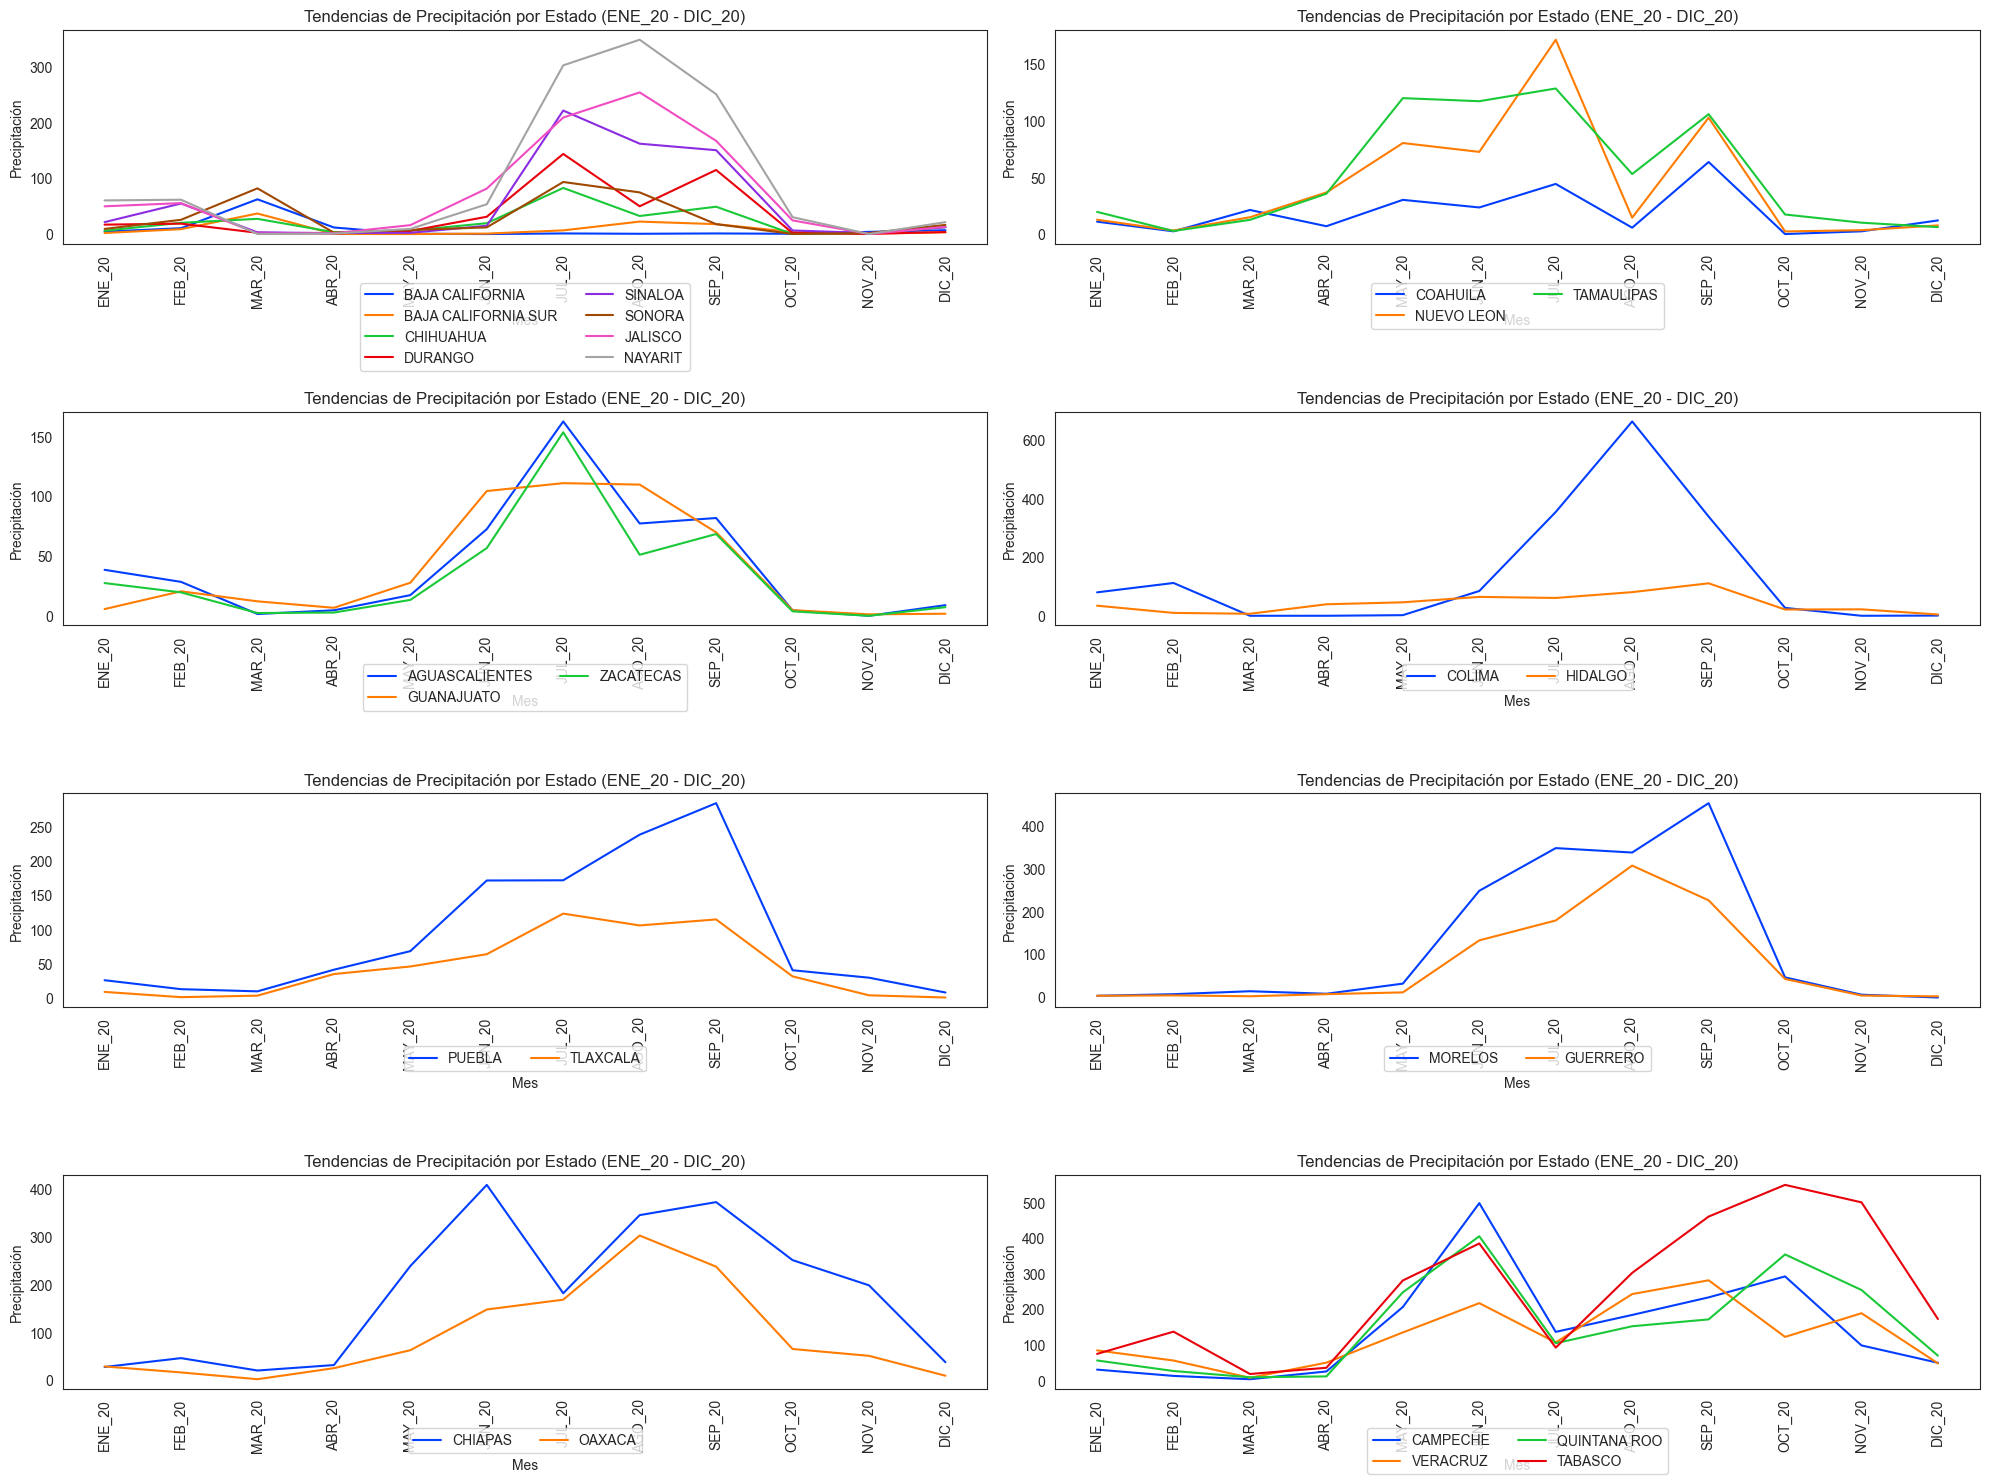

In [46]:
# Selecciona las columnas de interés (por ejemplo, ENE_18 hasta DIC_18)
columns_to_plot = ["ENE_20", "FEB_20", "MAR_20", "ABR_20", "MAY_20", "JUN_20", "JUL_20", "AGO_20", "SEP_20", "OCT_20", "NOV_20", "DIC_20"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

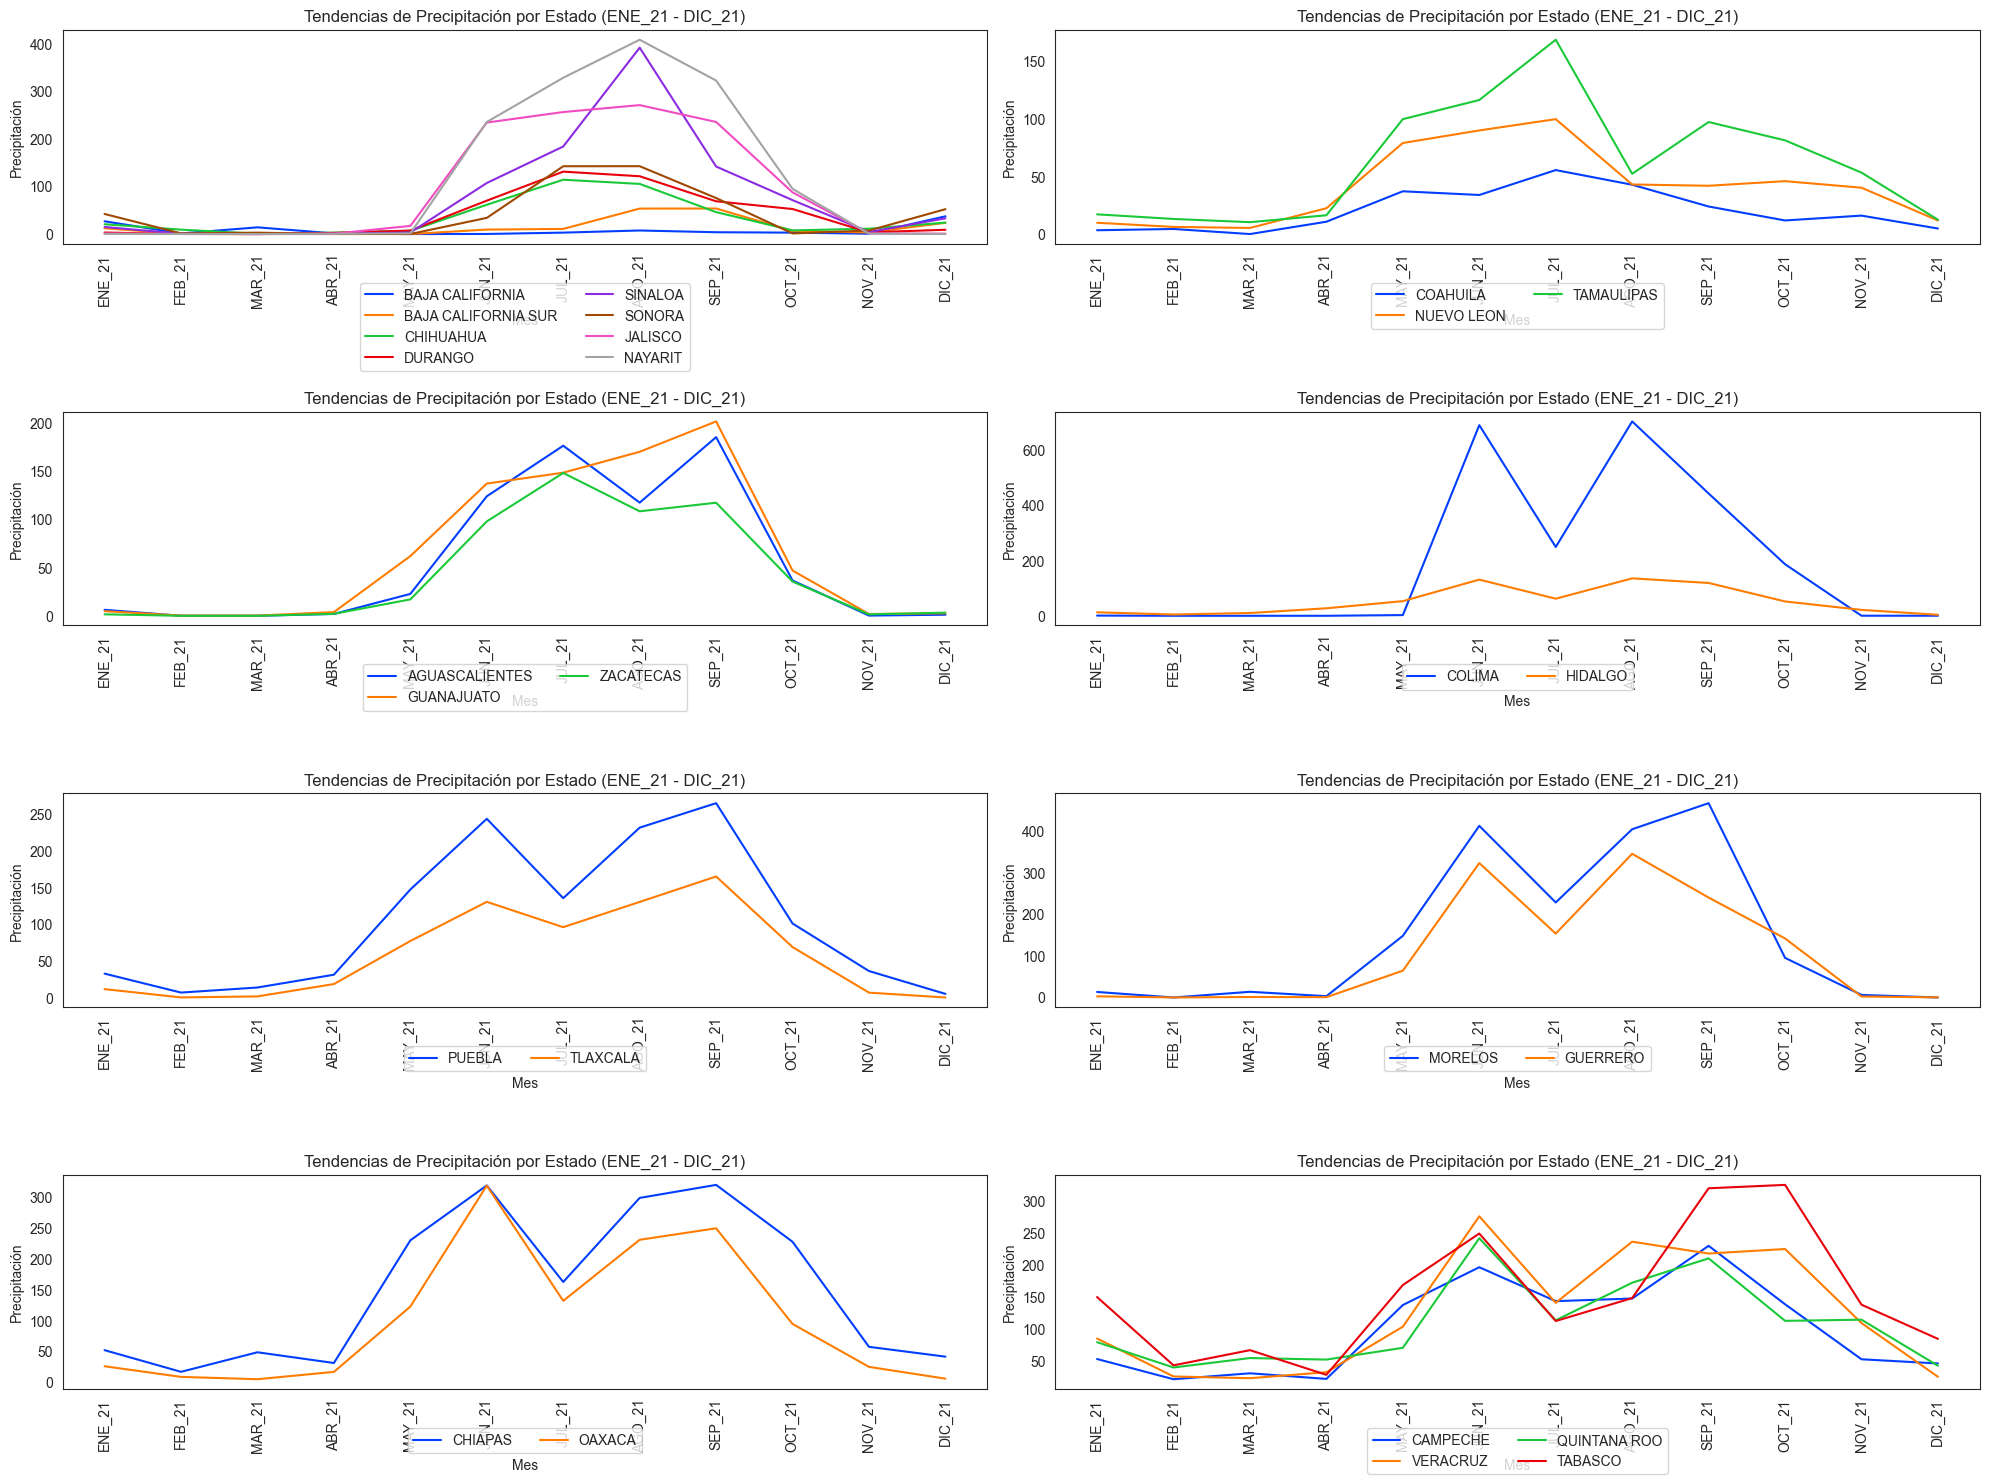

In [47]:
# Selecciona las columnas de interés (por ejemplo, ENE_18 hasta DIC_18)
columns_to_plot = ["ENE_21", "FEB_21", "MAR_21", "ABR_21", "MAY_21", "JUN_21", "JUL_21", "AGO_21", "SEP_21", "OCT_21", "NOV_21", "DIC_21"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

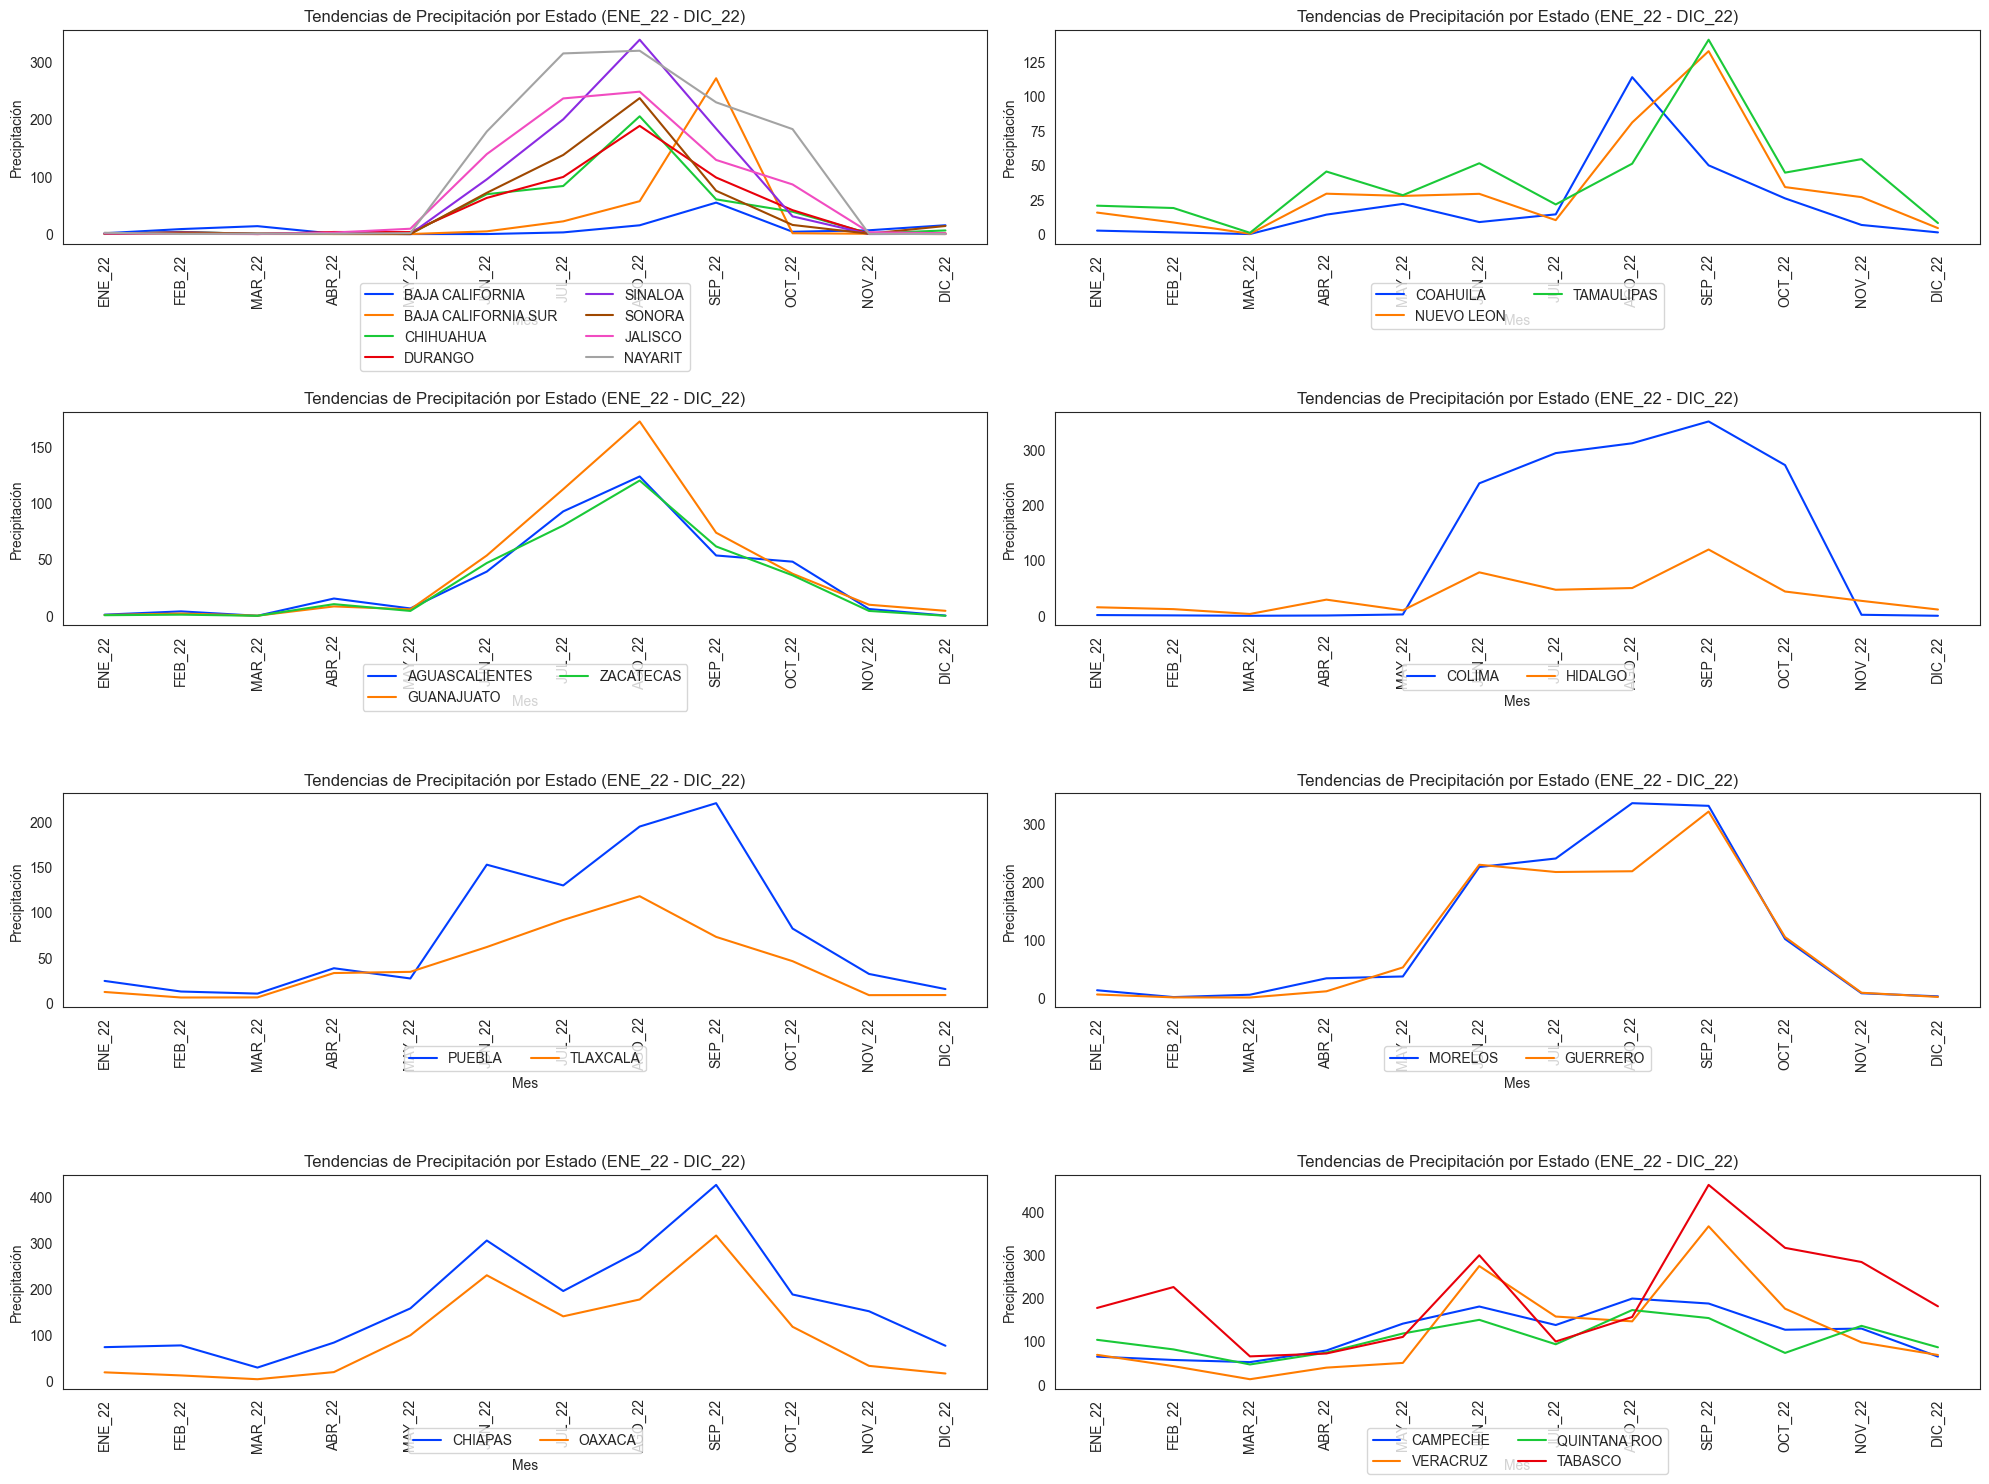

In [58]:
# Selecciona las columnas de interés (por ejemplo, ENE_18 hasta DIC_18)
columns_to_plot = ["ENE_22", "FEB_22", "MAR_22", "ABR_22", "MAY_22", "JUN_22", "JUL_22", "AGO_22", "SEP_22", "OCT_22", "NOV_22", "DIC_22"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = precip.loc[precip["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Mes")
    plt.ylabel("Precipitación")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

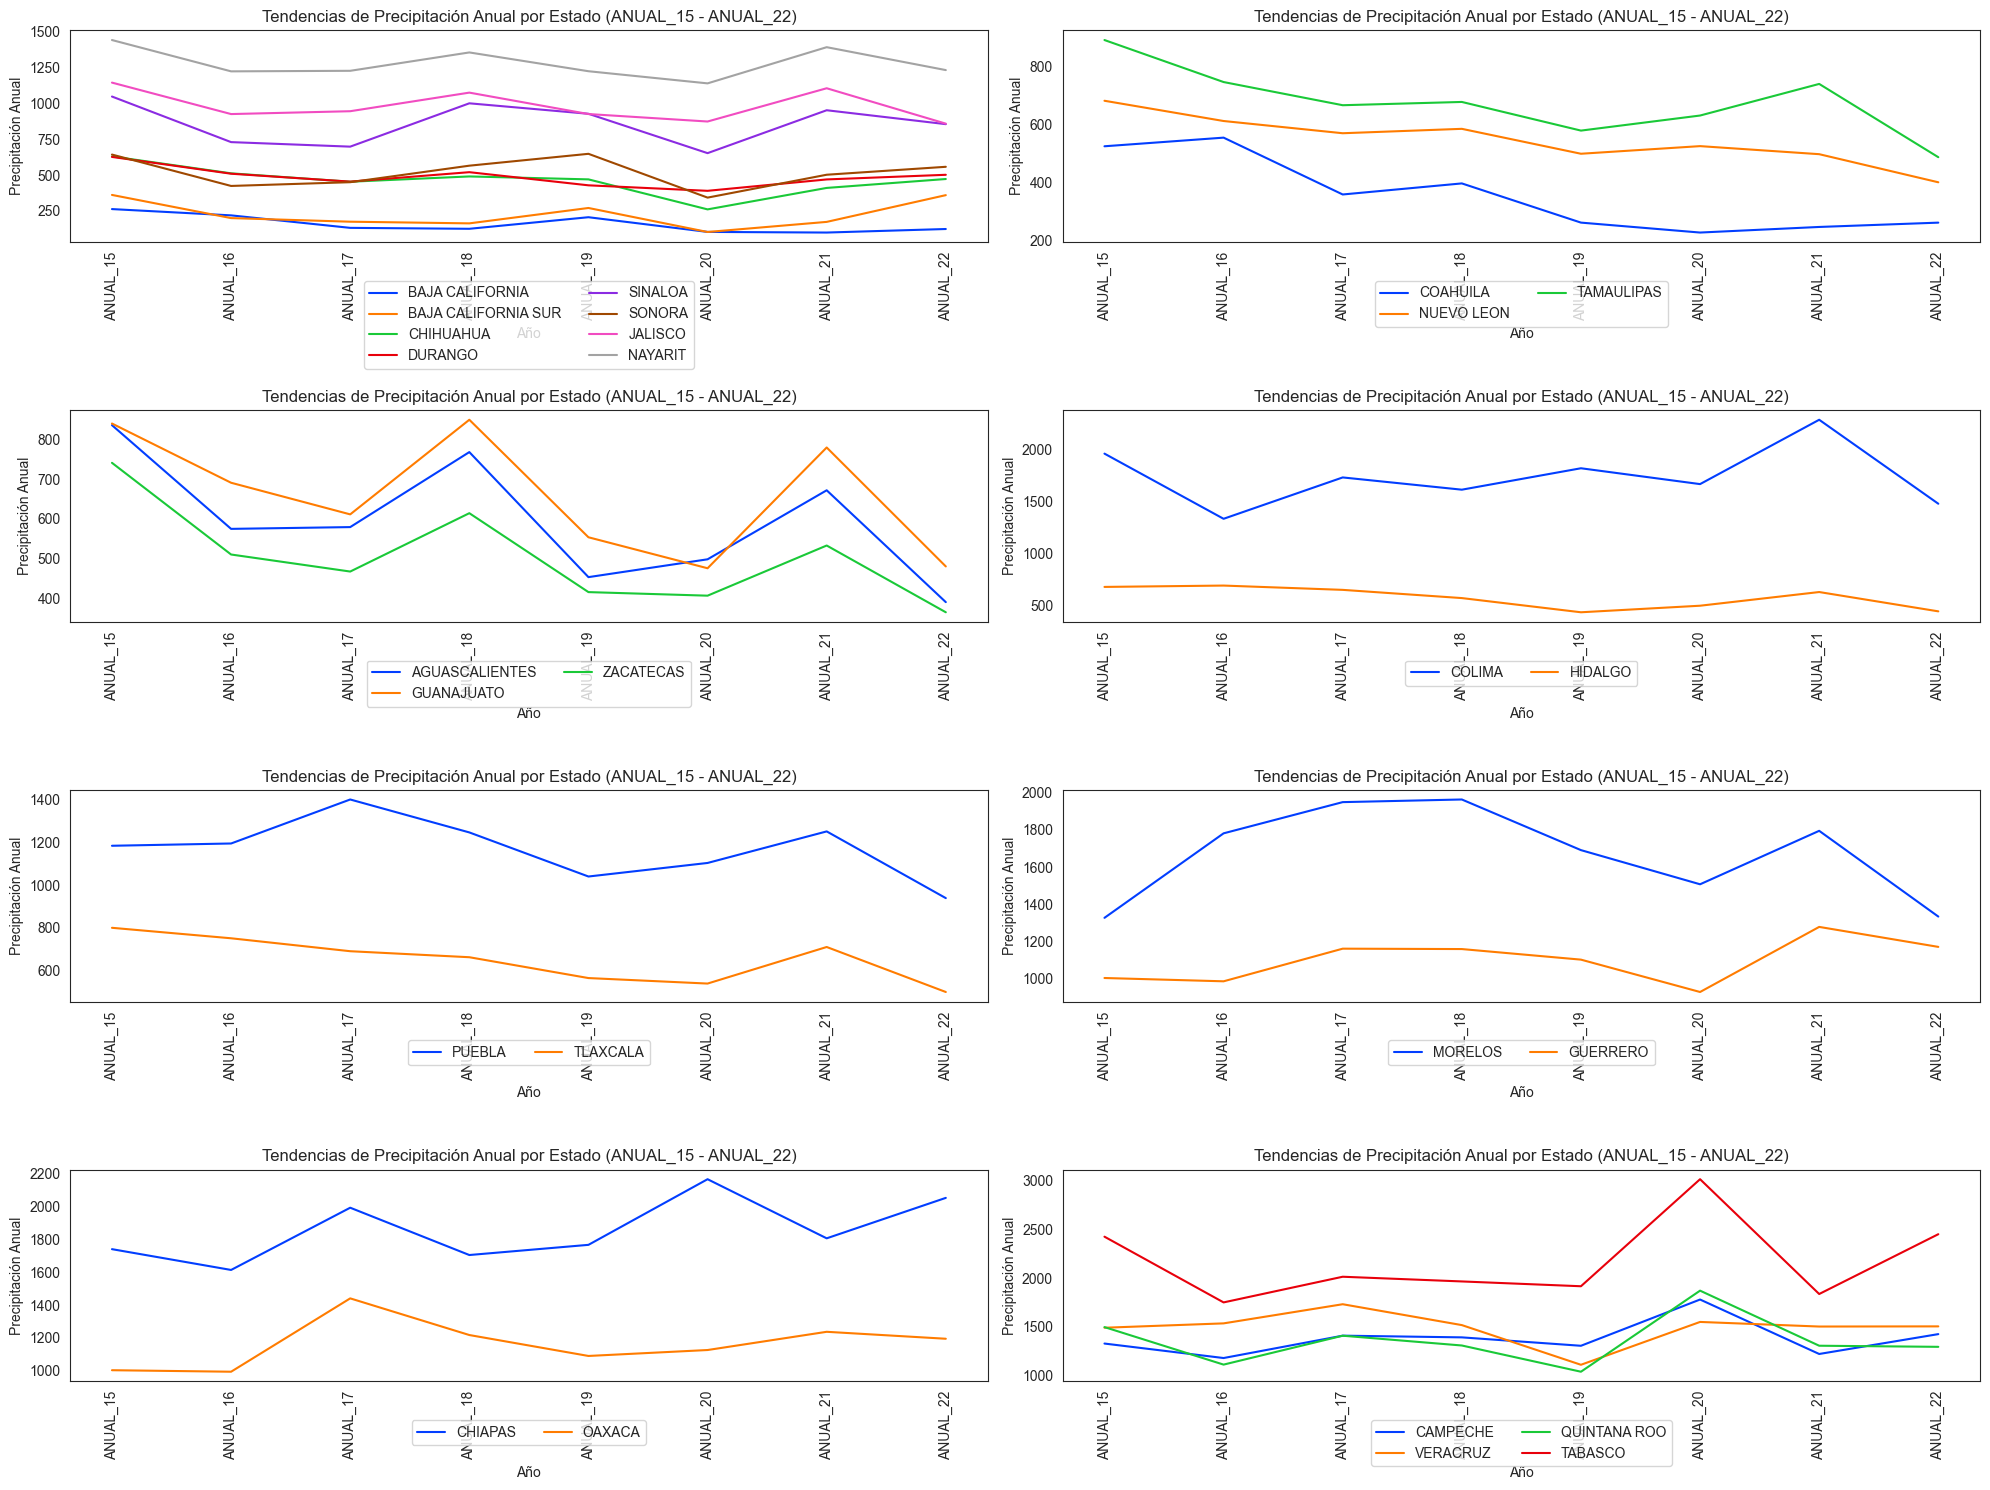

In [51]:
# Selecciona las columnas de interés para el año anual
columns_to_plot = ["ANUAL_15", "ANUAL_16", "ANUAL_17", "ANUAL_18", "ANUAL_19", "ANUAL_20", "ANUAL_21", "ANUAL_22"]

# Configura el tamaño del gráfico
plt.figure(figsize=(20, 15))

for i, (region, estados) in enumerate(regiones.items()):
    plt.subplot(4, 2, i + 1)
    for estado in estados:
        data = anuales.loc[anuales["ENTIDAD_15"] == estado, columns_to_plot]
        if not data.empty:
            plt.plot(columns_to_plot, data.values.flatten(), label=estado)

    plt.title(f"Tendencias de Precipitación Anual por Estado ({columns_to_plot[0]} - {columns_to_plot[-1]})")
    plt.xlabel("Año")
    plt.ylabel("Precipitación Anual")
    plt.xticks(rotation=90)
    plt.grid(False)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

